In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
from scipy import stats

#Load weather data 
df_RAW = pd.read_csv(r"C:\Users\manue\git\PDS\Project\PDS_Project\data\transform_DF_RAW",index_col=0)
df = pd.read_csv(r"C:\Users\manue\git\PDS\Project\PDS_Project\output_data\transform_DF",index_col=0)
weather = pd.read_csv(r"C:\Users\manue\git\PDS\Project\PDS_Project\data\frankfurt_weather_data2019.csv")

df_mapping = pd.Series({    0:"Monday" , 
                            1:"Tuesday" ,
                            2:"Wednesday" ,
                            3:"Thursday" ,
                            4:"Friday" ,
                            5:"Saturday" ,
                            6:"Sunday" })


# extract the month out of date 
df["month"] = df["Start_Time"].astype(str).str.extract(pat="(-[0-9]{2}-)")
df["month"] = df["month"].str.replace("-*-","")

# added day 
df["day"] = pd.Series(index=df.index,data=list(map(lambda x: df_mapping[int(pd.to_datetime(str(x)).weekday())], df["Start_Time"])))

# added hour 
df["hour"] = pd.Series(index=df.index, data=list(map(lambda x: str(df.loc[x]["Start_Time"])[11:13], df.index)))
    

# Central point Frankfurt
Center_point = [50.11552, 8.68417]





# holiday dates for 2019 for frankfurt
holiday_winter = dt.datetime(2019, 1,12)
holiday_spring = dt.datetime(2019, 4,27)
holiday_sommer = dt.datetime(2019, 8,9)
holiday_fall = dt.datetime(2019, 10,12)
holiday_crism = dt.datetime(2019, 12,31)


# create holiday feature 
date_list = pd.Series([str(holiday_winter - dt.timedelta(days=x)) for x in range(0,12)], dtype=str)
date_list2 = pd.Series([str(holiday_spring - dt.timedelta(days=x)) for x in range(0,12)], dtype=str)
date_list3 = pd.Series([str(holiday_sommer - dt.timedelta(days=x)) for x in range(0,40)], dtype=str)
date_list4 = pd.Series([str(holiday_fall - dt.timedelta(days=x)) for x in range(0,13)], dtype=str)
date_list5 = pd.Series([str(holiday_crism - dt.timedelta(days=x)) for x in range(0,9)], dtype=str)

date_list = date_list.append(date_list2, ignore_index = False).reset_index(drop = True)
date_list = date_list.append(date_list3, ignore_index = False).reset_index(drop = True)
date_list = date_list.append(date_list4, ignore_index = False).reset_index(drop = True)
date_list = date_list.append(date_list5, ignore_index = False).reset_index(drop = True)


# Stand alone holidays  
df_holiday = pd.Series({0:"2019-05-01",
                        1: "2019-05-30",
                        2: "2019-06-10",
                        3: "2019-06-20"})


df

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16


We have take a look to the distribution of duration and as show its a right skewed distribution with long tail.

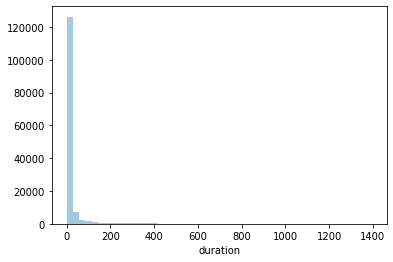

In [2]:
df_RAW["duration"].describe()
sns.distplot(df_RAW["duration"], bins=50, kde=False)
plt.show()

We assume that the distrubtion is indicator that the duration is timeseries with a negative trend. Under that assumption it is shown that we got many high duration values in the distruibution. A right shrewed distribution. The outliner should be caused maybe by system fails or failed logouts for the bike rentails. We use a month based analyse for the outliner because the investigation showed that the month differt greatly. So outliner would be defined differently between them. To identify the outliners we investigate each month duration values distribution in a boxplot.

,Station_position,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Start_Place,Station_number,Start_Longitude,Bike_position,duration,weekday,End_Station_position,End_time,End_position_UID,End_Latitude,End_Longitude,End_Station_number,zipcodes,month
0,False,2019-06-25 21:51:00,11420,17990636,1,49.991072,BIKE 11420,0.0,8.412515,True,7.0,True,False,2019-06-25 21:58:00,18030139,49.984942,8.409474,0.0,65428,06
1,False,2019-06-26 01:39:00,11420,18030139,1,49.984942,BIKE 11420,0.0,8.409474,True,7.0,True,False,2019-06-26 01:46:00,18030139,49.984942,8.409474,0.0,65428,06
2,False,2019-06-26 06:33:00,11420,18030139,1,49.984942,BIKE 11420,0.0,8.409474,True,14.0,True,False,2019-06-26 06:47:00,18040915,49.985673,8.424641,0.0,65428,06
3,False,2019-06-27 13:20:00,11420,18097546,1,49.985613,BIKE 11420,0.0,8.424448,True,7.0,True,False,2019-06-27 13:27:00,18120088,49.985538,8.424533,0.0,65428,06
4,False,2019-06-27 13:30:00,11420,18120088,1,49.985528,BIKE 11420,0.0,8.424512,True,4.0,True,False,2019-06-27 13:34:00,18120474,49.985679,8.424603,0.0,65428,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154338,True,2019-08-09 03:50:00,44115,4919237,5,50.091681,4206 - Sandhofstraße,4206.0,8.653257,False,5.0,True,True,2019-08-09 03:55:00,4919237,50.091681,8.653257,4206.0,60528,08
154339,True,2019-08-10 22:52:00,44115,4919237,5,50.091681,4206 - Sandhofstraße,4206.0,8.653257,False,7.0,False,True,2019-08-10 22:59:00,4919237,50.091681,8.653257,4206.0,60528,08
154340,True,2019-08-11 22:58:00,44115,4919237,4,50.091681,4206 - Sandhofstraße,4206.0,8.653257,False,7.0,False,True,2019-08-11 23:05:00,4919237,50.091681,8.653257,4206.0,60528,08
154343,True,2019-10-05 23:21:00,6208,121962,13,50.107599,4240 - Hauptbahnhof / Vorplatz,4240.0,8.664168,False,7.0,False,True,2019-10-05 23:28:00,121962,50.107599,8.664168,4240.0,60329,10


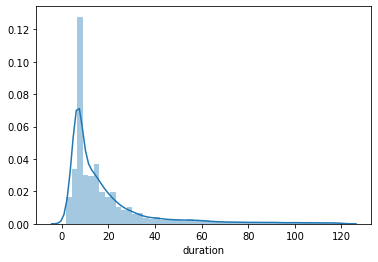

In [3]:
    # extract the month out of date 
    df_RAW["month"] = df_RAW["Starttime"].astype(str).str.extract(pat="(-[0-9]{2}-)")
    df_RAW["month"] = df_RAW["month"].str.replace("-*-","")
    
    # Separate the df by month 
    Stat_Ja_RAW = df_RAW[df_RAW["month"] == "01"]
    Stat_Fe_RAW = df_RAW[df_RAW["month"] == "02"]
    Stat_Ma_RAW = df_RAW[df_RAW["month"] == "03"]
    Stat_Ap_RAW = df_RAW[df_RAW["month"] == "04"]
    Stat_May_RAW = df_RAW[df_RAW["month"] == "05"]
    Stat_Ju_RAW = df_RAW[df_RAW["month"] == "06"]
    
    Stat_Au_RAW = df_RAW[df_RAW["month"] == "08"]
    Stat_Se_RAW = df_RAW[df_RAW["month"] == "09"]
    Stat_Oc_RAW = df_RAW[df_RAW["month"] == "10"]
    Stat_No_RAW = df_RAW[df_RAW["month"] == "11"]
    Stat_De_RAW = df_RAW[df_RAW["month"] == "12"]
    

    # search for trips where the duration is under or equal 3 minutes and the position doesnt changed
    short_trip = df_RAW[(df_RAW["duration"] <= float(3)) & (df_RAW["End_position_UID"] == df_RAW["Start_position_UID"])]

    # write DF without reduction
    long_trips = df_RAW[(df_RAW["duration"] > float(120))]

    # drop short values from data frame
    df_RAW.drop(short_trip.index, inplace=True)
    df_RAW.drop(long_trips.index, inplace=True)
    sns.distplot(df_RAW["duration"])
    df_RAW

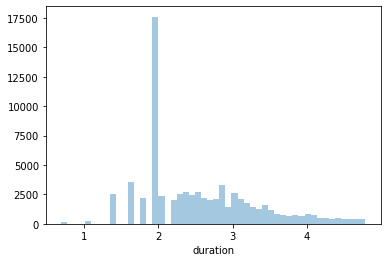

In [4]:
# after log transform 
sns.distplot(df_RAW["duration"].apply(np.log), kde=False)

Text(0.0, 1.0, 'August')

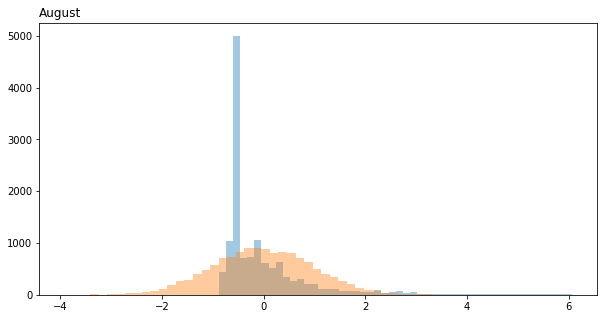

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(stats.zscore(df_RAW[df_RAW["month"] == str("08")]["duration"]), ax=ax, kde=False)
sns.distplot(np.random.normal(size=len(df_RAW[df_RAW["month"] == str("08")]["duration"]) ), ax=ax, kde=False)
ax.set_title("August", loc=('left'))

In [6]:

    time_frames = pd.DataFrame(df_RAW["Starttime"].value_counts())

    # get start times occur more then 4 times number of bikes that can be lent in parall
    time_frames = time_frames[time_frames["Starttime"] > 4]

    # get bookings in df
    wrong = df_RAW[df_RAW["Starttime"].isin(time_frames.index)].sort_values("Starttime")

    # find bookings that has also same end
    time_frames_end = pd.DataFrame(df_RAW["End_time"].value_counts())

    # occur more then 4 times with same end
    time_frames_end = time_frames_end[time_frames_end["End_time"] > 4]

    # get the wrong trips with the same ends and starts with more then 4 occur
    wrong_eND = wrong[wrong["End_time"].isin(time_frames_end.index)]

    # get statistics of bookings
    wrong_eND.groupby("Starttime")["duration"].mean()
    wrong_eND.groupby("Starttime")["duration"].count()
    wrong_eND.groupby("Starttime")["duration"].min()

    # orchestrate statistics to data frame
    wrong_data = pd.DataFrame(columns=["Mean", "Count", "min"], index=wrong_eND["Starttime"],
                              data={"Mean": wrong_eND.groupby("Starttime")["duration"].mean(),
                                    "min": wrong_eND.groupby("Starttime")["duration"].min(),
                                    "Count": wrong_eND.groupby("Starttime")["duration"].count()})

    # get dates that has to be dropped
    true = wrong_data.groupby("Starttime").max().sort_values("min")["Count"] > 4

    start_time = true.index.astype(str)

    # drop trip from data frame
    df_RAW.drop(df_RAW[df_RAW["Starttime"].isin(start_time)].index, inplace=True)

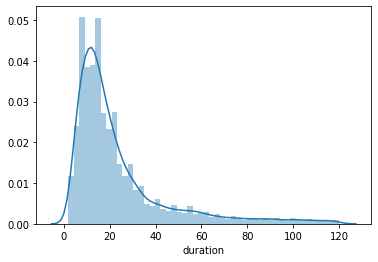

In [7]:
# after dropping batches
sns.distplot(df_RAW["duration"])

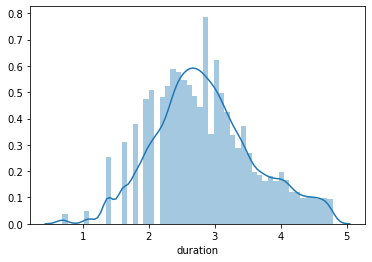

In [8]:
# use log transformation
sns.distplot(df_RAW["duration"].apply(np.log))

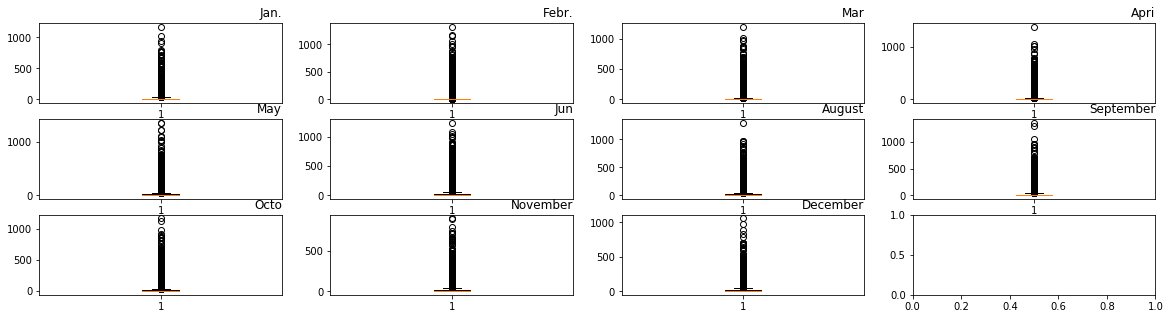

In [9]:
fig, ax = plt.subplots(nrows = 3,ncols=4, figsize=(20,5))

# Set the boxplots for each month for the raw data 
result_Januar = ax[0][0].boxplot(Stat_Ja_RAW["duration"],whis=2)
ax[0][0].set_title("Jan.", loc=("right"))
result_Februar = ax[0][1].boxplot(Stat_Fe_RAW["duration"],whis=2)
ax[0][1].set_title("Febr.", loc=("right"))
result_March = ax[0][2].boxplot(Stat_Ma_RAW["duration"],whis=2)
ax[0][2].set_title("Mar", loc=("right"))
result_April = ax[0][3].boxplot(Stat_Ap_RAW["duration"],whis=2)
ax[0][3].set_title("Apri", loc=("right"))
result_May = ax[1][0].boxplot(Stat_May_RAW["duration"],whis=2)
ax[1][0].set_title("May", loc=("right"))
result_June = ax[1][1].boxplot(Stat_Ju_RAW["duration"],whis=2)
ax[1][1].set_title("Jun", loc=("right"))
result_August = ax[1][2].boxplot(Stat_Au_RAW["duration"],whis=2)
ax[1][2].set_title("August", loc=("right"))
result_September = ax[1][3].boxplot(Stat_Se_RAW["duration"],whis=2)
ax[1][3].set_title("September", loc=("right"))
result_October = ax[2][0].boxplot(Stat_Oc_RAW["duration"],whis=2)
ax[2][0].set_title("Octo", loc=("right"))
result_November = ax[2][1].boxplot(Stat_No_RAW["duration"],whis=2)
ax[2][1].set_title("November", loc=("right"))
result_December = ax[2][2].boxplot(Stat_De_RAW["duration"],whis=2)
ax[2][2].set_title("December", loc=("right"))

plt.show()



As the boxplot shows we have find many outliners in each month. So we decide to drop every trip first that is less or equal then 3 minutes and the location did not changed. Because this are no real trips, just failed lents where the booking process failed and it is not interesting for us we have decide to drop them.

count    51393.000000
mean        23.548907
std         21.345325
min          2.000000
25%         11.000000
50%         16.000000
75%         27.000000
max        120.000000
Name: Duration, dtype: float64


,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16


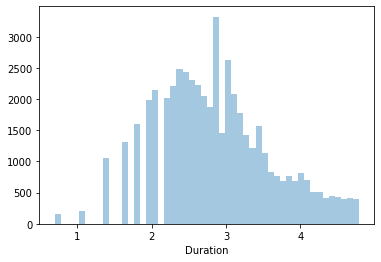

In [10]:
sns.distplot(df["Duration"].apply(np.log), bins= 50, kde=False)
print(df["Duration"].describe())
df

As the Distribution showed us even after dropping many short trips, the distribution is still right skwred and weight spreaded from 2 to 1394 minutes. We indicate that this could because the duration of the  . We decided due to low density and weight spread of values to drop every trip that is over 2 hours long. Because this trips are not usable for our further analysis and will corrupt the prediction. Where as the main part of the trips duration are around 2 minutes and 120 Minutes (93 %). This leads to bad prediction in long tail but better prediction in the main more predictable part of the distribution. We decide to drop that trips for the duration prediction because that bookings might to be created by the booking where stops are in them. 

In [11]:
long = df[df["Duration"] > 120] 
short = df[df["Duration"] <= 120]
long["Duration"] = 120

long = long.append(short)
df = long


df

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16


We will start the analsys on the hole dataset with the long tail. We will now start our analysis of the prediction duration and the classification task. 

In [12]:
    

# Separate the df by month 
Stat_Ja = df[df["month"] == "01"]
Stat_Fe = df[df["month"] == "02"]
Stat_Ma = df[df["month"] == "03"]
Stat_Ap = df[df["month"] == "04"]
Stat_May = df[df["month"] == "05"]
Stat_Ju = df[df["month"] == "06"]
Stat_Au = df[df["month"] == "08"]
Stat_Se = df[df["month"] == "09"]
Stat_Oc = df[df["month"] == "10"]
Stat_No = df[df["month"] == "11"]
Stat_De = df[df["month"] == "12"]



count    8300.000000
mean       23.007952
std        18.955798
min         2.000000
25%        11.000000
50%        17.000000
75%        27.000000
max       120.000000
Name: Duration, dtype: float64


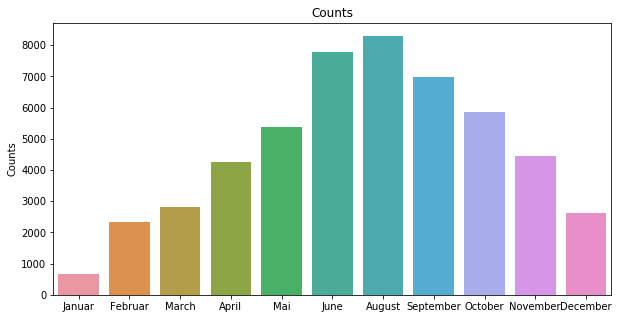

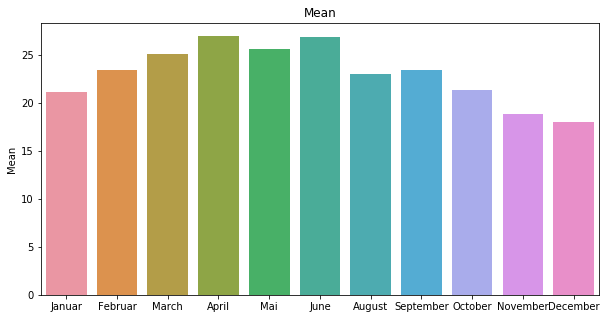

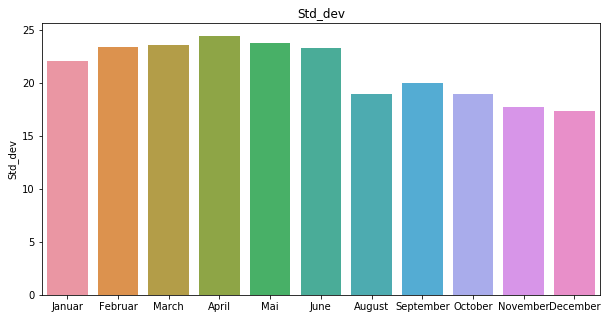

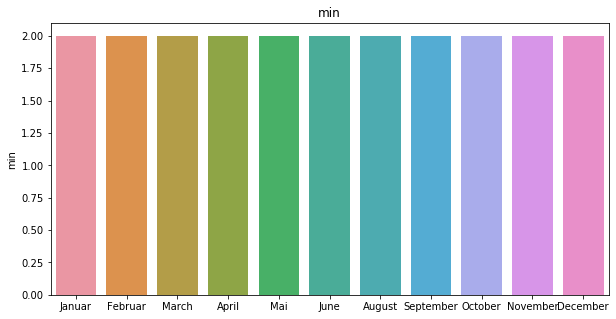

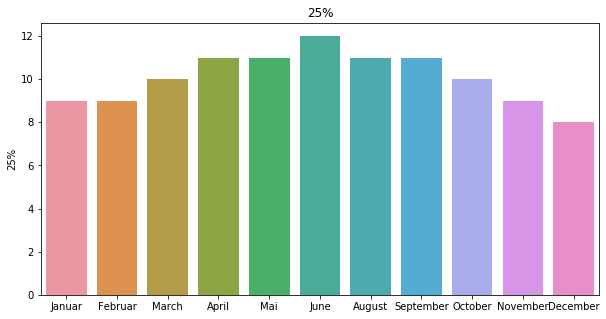

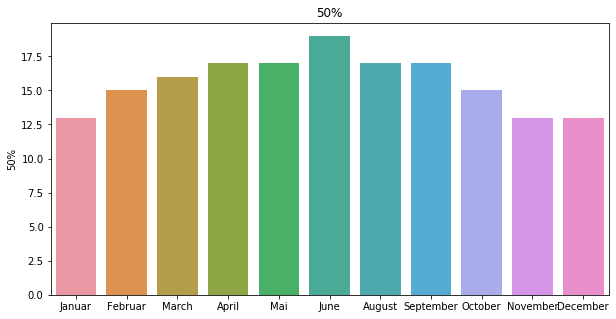

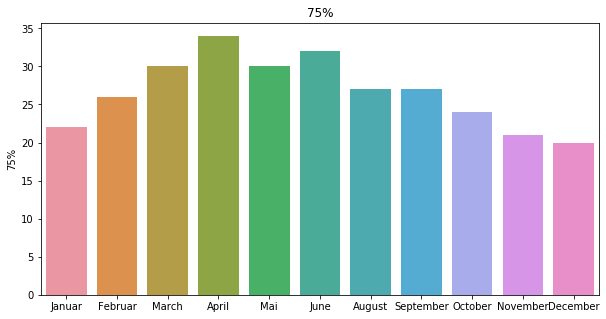

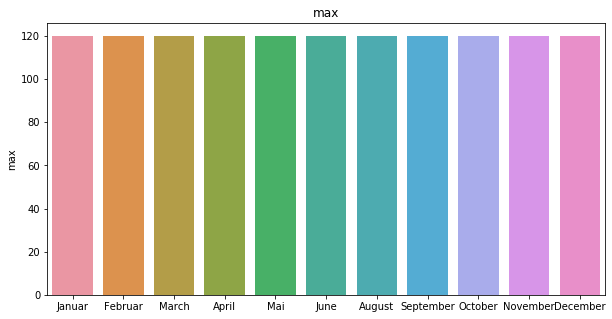

weekend------------------------------------------------------
weekday------------------------------------------------------
7435.0
7109.0


C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Matplotlib is current

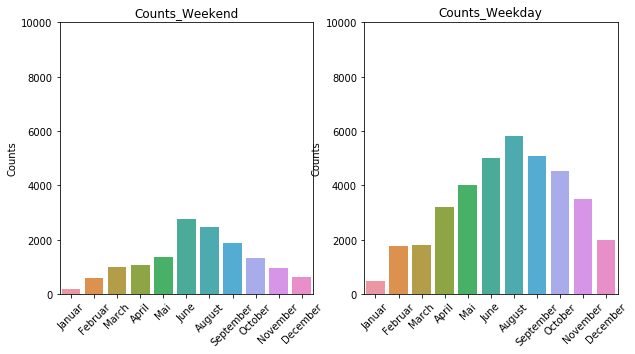

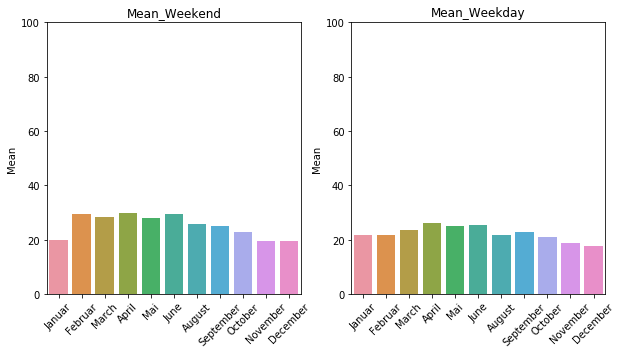

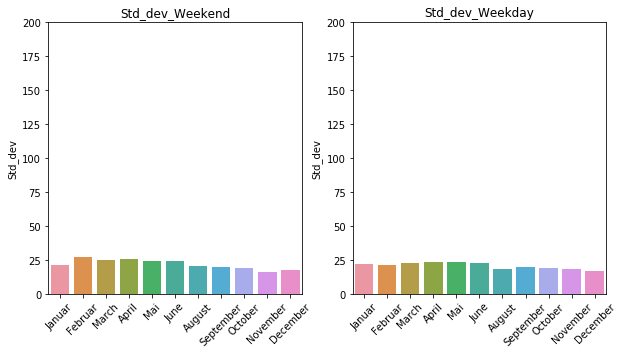

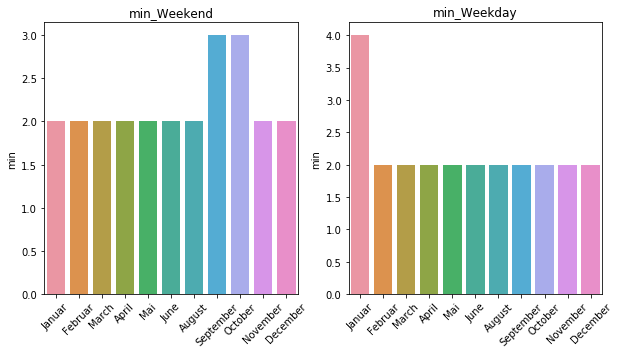

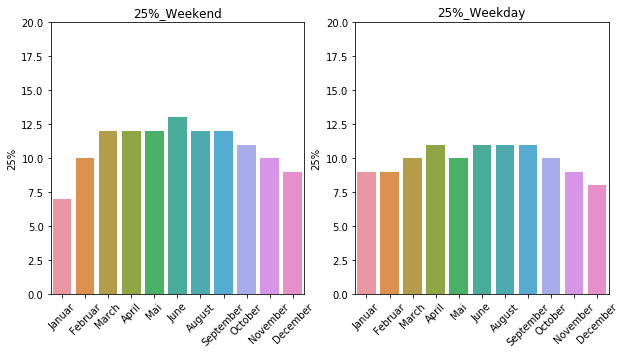

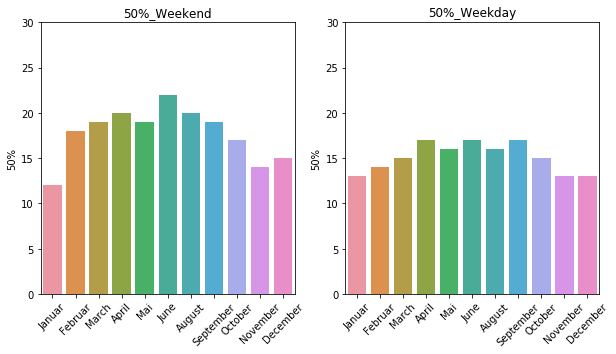

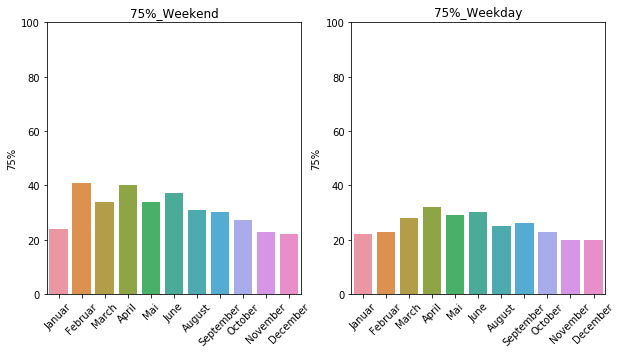

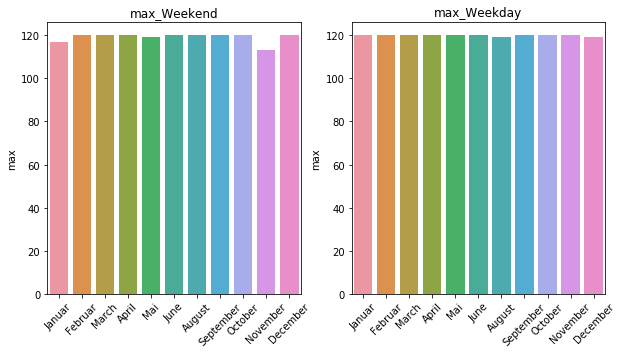

In [13]:
    
# extract the month out of date 
df["month"] = df["Start_Time"].astype(str).str.extract(pat="(-[0-9]{2}-)")
df["month"] = df["month"].str.replace("-*-","")
    
# Separate the df by month 
Stat_Ja_total = df[df["month"] == "01"]["Duration"].describe().values
Stat_Fe_total = df[df["month"] == "02"]["Duration"].describe().values
Stat_Ma_total = df[df["month"] == "03"]["Duration"].describe().values
Stat_Ap_total = df[df["month"] == "04"]["Duration"].describe().values
Stat_May_total = df[df["month"] == "05"]["Duration"].describe().values
Stat_Ju_total = df[df["month"] == "06"]["Duration"].describe().values

Stat_Au_total = df[df["month"] == "08"]["Duration"].describe().values
Stat_Se_total = df[df["month"] == "09"]["Duration"].describe().values
Stat_Oc_total = df[df["month"] == "10"]["Duration"].describe().values
Stat_No_total = df[df["month"] == "11"]["Duration"].describe().values
Stat_De_total = df[df["month"] == "12"]["Duration"].describe().values
print(df[df["month"] == "08"]["Duration"].describe())
exit(1)
month_duration = pd.DataFrame(index = ["Januar","Februar","March","April","Mai","June","August","September","October","November","December"],
                              data = [Stat_Ja_total, Stat_Fe_total,Stat_Ma_total,Stat_Ap_total, Stat_May_total, 
                                      Stat_Ju_total, Stat_Au_total, Stat_Se_total, Stat_Oc_total, Stat_No_total, Stat_De_total],
                              columns=["Counts","Mean", "Std_dev","min", "25%", "50%", "75%", "max"])




for value in month_duration.columns:
     
        
        sns.barplot(month_duration.index, month_duration[value]).set_title(value)
        
        fig  = plt.gcf()
        fig.set_figwidth(10)
        fig.set_figheight(5)
        plt.show()



# ------------------------------------------------------    
# weekend


print("weekend------------------------------------------------------")
Stat_Ja_wee = Stat_Ja[Stat_Ja["Weekday"] == False]["Duration"].describe().values
Stat_Fe_wee = Stat_Fe[Stat_Fe["Weekday"] == False]["Duration"].describe().values
Stat_Ma_wee = Stat_Ma[Stat_Ma["Weekday"] == False]["Duration"].describe().values
Stat_Ap_wee = Stat_Ap[Stat_Ap["Weekday"] == False]["Duration"].describe().values
Stat_May_wee = Stat_May[Stat_May["Weekday"] == False]["Duration"].describe().values
Stat_Ju_wee = Stat_Ju[Stat_Ju["Weekday"] == False]["Duration"].describe().values

Stat_Au_wee = Stat_Au[Stat_Au["Weekday"] == False]["Duration"].describe().values
Stat_Se_wee = Stat_Se[Stat_Se["Weekday"] == False]["Duration"].describe().values
Stat_Oc_wee = Stat_Oc[Stat_Oc["Weekday"] == False]["Duration"].describe().values
Stat_No_wee = Stat_No[Stat_No["Weekday"] == False]["Duration"].describe().values
Stat_De_wee = Stat_De[Stat_De["Weekday"] == False]["Duration"].describe().values  

month_duration_wee = pd.DataFrame(index = ["Januar","Februar","March","April","Mai","June","August","September","October","November","December"],
                              data = [Stat_Ja_wee, Stat_Fe_wee,Stat_Ma_wee,Stat_Ap_wee, Stat_May_wee, Stat_Ju_wee, Stat_Au_wee, Stat_Se_wee, Stat_Oc_wee, Stat_No_wee, Stat_De_wee],
                              columns=["Counts","Mean", "Std_dev","min", "25%", "50%", "75%", "max"])

# ------------------------------------------------------
# weekday
print("weekday------------------------------------------------------")
Stat_Ja_we = Stat_Ja[Stat_Ja["Weekday"] == True]["Duration"].describe().values
Stat_Fe_we = Stat_Fe[Stat_Fe["Weekday"] == True]["Duration"].describe().values
Stat_Ma_we = Stat_Ma[Stat_Ma["Weekday"] == True]["Duration"].describe().values
Stat_Ap_we = Stat_Ap[Stat_Ap["Weekday"] == True]["Duration"].describe().values
Stat_May_we = Stat_May[Stat_May["Weekday"] == True]["Duration"].describe().values
Stat_Ju_we = Stat_Ju[Stat_Ju["Weekday"] == True]["Duration"].describe().values

Stat_Au_we = Stat_Au[Stat_Au["Weekday"] == True]["Duration"].describe().values
Stat_Se_we = Stat_Se[Stat_Se["Weekday"] == True]["Duration"].describe().values
Stat_Oc_we = Stat_Oc[Stat_Oc["Weekday"] == True]["Duration"].describe().values
Stat_No_we = Stat_No[Stat_No["Weekday"] == True]["Duration"].describe().values
Stat_De_we = Stat_De[Stat_De["Weekday"] == True]["Duration"].describe().values  

month_duration_we = pd.DataFrame(index = ["Januar","Februar","March","April","Mai","June","August","September","October","November","December"],
                              data = [Stat_Ja_we, Stat_Fe_we,Stat_Ma_we,Stat_Ap_we, Stat_May_we, Stat_Ju_we, Stat_Au_we, Stat_Se_we, Stat_Oc_we, Stat_No_we, Stat_De_we],
                              columns=["Counts","Mean", "Std_dev","min", "25%", "50%", "75%", "max"])


print(month_duration_we["Counts"].sum()/5)
print(month_duration_wee["Counts"].sum()/2)
for value in month_duration_wee.columns:
        
        label_we = value + "_Weekday"
        label_wee = value + "_Weekend"
        
       
        fig, ax =plt.subplots(1,2)
        ax1 = sns.barplot(month_duration_wee.index, month_duration_wee[value], ax=ax[0]).set_title(label_wee)
        ax2 = sns.barplot(month_duration_we.index, month_duration_we[value], ax=ax[1]).set_title(label_we)
        if value == "Counts":
            ax[0].set_ylim(0,10000)
            ax[1].set_ylim(0,10000)
        if value == "Std_dev": 
            ax[0].set_ylim(0,200)
            ax[1].set_ylim(0,200)
            
        if value == "Mean": 
            ax[0].set_ylim(0,100)
            ax[1].set_ylim(0,100)
        if value == "25%":
            ax[0].set_ylim(0,20)
            ax[1].set_ylim(0,20)
        if value == "50%": 
            ax[0].set_ylim(0,30)
            ax[1].set_ylim(0,30)
            
        if value == "75%": 
            ax[0].set_ylim(0,100)
            ax[1].set_ylim(0,100)
    
    
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
        
        fig  = plt.gcf()
        fig.set_figwidth(10)
       
        fig.set_figheight(5)
        fig.show()
        
        


- not many trips in (Jan, Feb, Mar, No, Dec)
- High std. deviation, mean for that month, but low median and 75 % quantil
- indicate very high values in the 75% to 100% qantil for that months. 
- Differ. between weekday and weekend: 
- Average number of trips equal 11200, 11000
- Weekend feb, jan and march higher then weekday



Now we take a look into the distribution  

Text(0.0, 1.0, 'December')

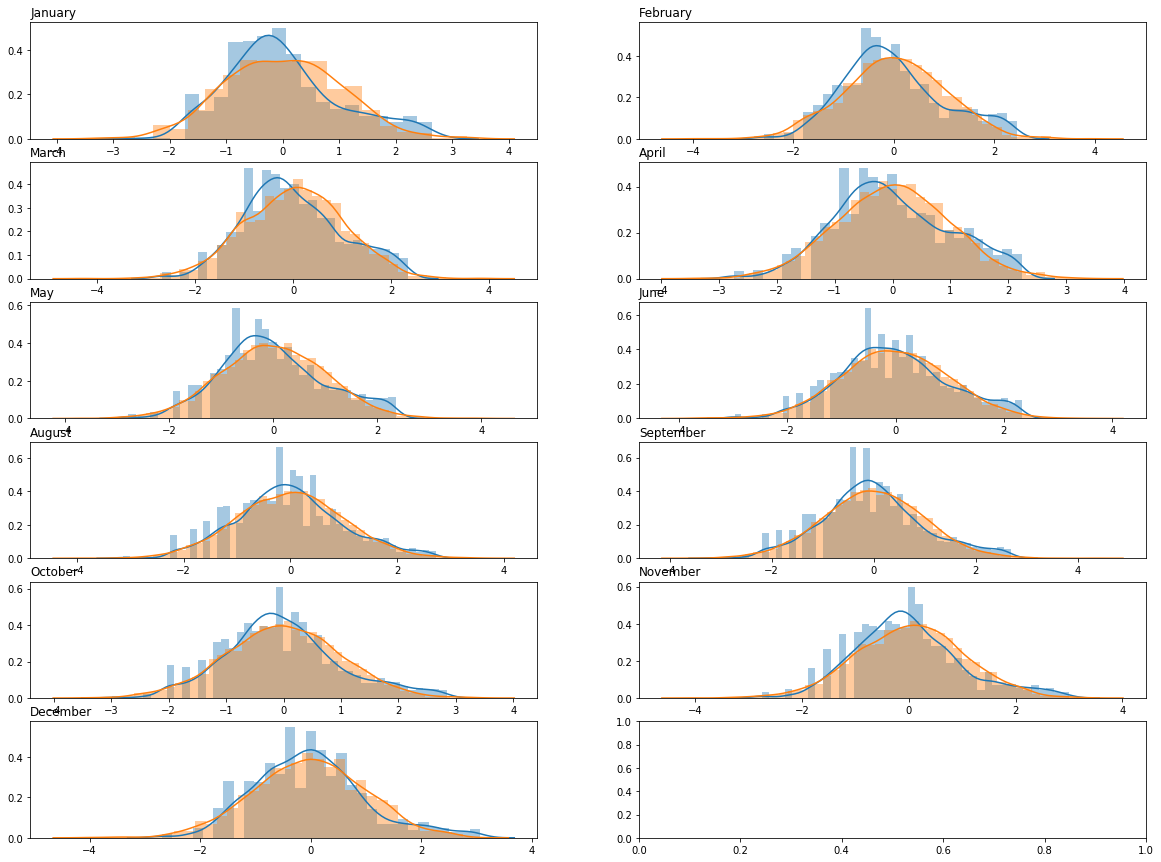

In [14]:
# distribution by monthafter reduction
fig, ax = plt.subplots(6,2, figsize=(20,15))

# Import the z-score 
from scipy import stats




sns.distplot(stats.zscore(df[(df["month"] == str("01"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[0][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("01"))& (df["Duration"])])), ax=ax[0][0])
ax[0][0].set_title("January", loc=('left'))

sns.distplot(stats.zscore(df[(df["month"] == str("02"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[0][1])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("02"))& (df["Duration"])])), ax=ax[0][1])
ax[0][1].set_title("February", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("03"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[1][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("03"))& (df["Duration"])])), ax=ax[1][0])
ax[1][0].set_title("March", loc=('left'))

sns.distplot(stats.zscore(df[(df["month"] == str("04"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[1][1])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("04"))& (df["Duration"])])), ax=ax[1][1])
ax[1][1].set_title("April", loc=('left'))

sns.distplot(stats.zscore(df[(df["month"] == str("05"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[2][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("05"))& (df["Duration"])])), ax=ax[2][0])
ax[2][0].set_title("May", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("06"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[2][1])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("06"))& (df["Duration"])])), ax=ax[2][1])
ax[2][1].set_title("June", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("08"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[3][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("08"))& (df["Duration"])])), ax=ax[3][0])
ax[3][0].set_title("August", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("09"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[3][1])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("09"))& (df["Duration"])])), ax=ax[3][1])
ax[3][1].set_title("September", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("10"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[4][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("10")) & (df["Duration"])])), ax=ax[4][0])
ax[4][0].set_title("October", loc=('left'))


sns.distplot(stats.zscore(df[(df["month"] == str("11"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[4][1])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("11"))& (df["Duration"])])), ax=ax[4][1])
ax[4][1].set_title("November", loc=('left'))

sns.distplot(stats.zscore(df[(df["month"] == str("12"))& (df["Duration"])]["Duration"].apply(np.log)), ax=ax[5][0])
sns.distplot(np.random.normal(size=len(df[(df["month"] == str("12"))& (df["Duration"])])), ax=ax[5][0])
ax[5][0].set_title("December", loc=('left'))



Distribution are right skewed long tail. We decided to use a log transformation. Shown that each month has its densities point. Compared to the to the normal distribution. 

Next we will look at the distribution over the week. We look at the average duration over the year on weekly base and daily base. 

In [15]:

# create dates
start = dt.datetime(2019,1,20)
dates = pd.date_range(start=start, end=dt.datetime(2019,6,30), periods=162)
start = dt.datetime(2019,8,1)
dates2 = pd.date_range(start=start, end=dt.datetime(2019,12,31), periods=153)
dates = dates.append(dates2) 
dates

median = pd.Series(index = dates, data = 0)
mean = pd.Series(index = dates, data = 0)
std = pd.Series(index = dates, data = 0)



count = 0
for i in range(0,315):
    start = dates[count]
    
    if i == 314:
        median.loc[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates[314])]["Duration"].describe()[4]
        mean.loc[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates[314])]["Duration"].describe()[1] 
        std[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates[314])]["Duration"].describe()[2] 
        print(count, mean.loc[dates[count]])
        break;
        
    end = dates[count+1]
    median.loc[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[4]
    mean.loc[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[1]               
    std[dates[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[2]        
    count+=1    



314 15.45679012345679


In [16]:
start = dt.datetime(2019,1,20)

dates_we = pd.date_range(start=start, end=dt.datetime(2019,12,31), freq='w')
dates_we = dates_we.delete(loc=[24,25,26,27])
dates_we

print(dates_we)
median_we = pd.Series(index = dates_we, data = 0)
mean_we = pd.Series(index = dates_we, data = 0)
std_we = pd.Series(index = dates_we, data = 0)



count = 0
for i in range(0,46):
    start = dates_we[count]
    
    if i == 45:
        median_we.loc[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates_we[44])]["Duration"].describe()[4]
        mean_we.loc[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates_we[44])]["Duration"].describe()[1] 
        std[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= dates_we[44])]["Duration"].describe()[2] 
        
        break;
        
    end = dates_we[count+1]
    median_we.loc[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[4]
    mean_we.loc[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[1]               
    std[dates_we[count]] = df[(pd.to_datetime(df["Start_Time"]) >= start) & (pd.to_datetime(df["Start_Time"]) < end)]["Duration"].describe()[2]        
    
    count+=1    

DatetimeIndex(['2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
               '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10',
               '2019-03-17', '2019-03-24', '2019-03-31', '2019-04-07',
               '2019-04-14', '2019-04-21', '2019-04-28', '2019-05-05',
               '2019-05-12', '2019-05-19', '2019-05-26', '2019-06-02',
               '2019-06-09', '2019-06-16', '2019-06-23', '2019-06-30',
               '2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', freq=None)


In [17]:
#create average based on month average

start = dt.datetime(2018,12,31)

dates_mo = pd.date_range(start=start, end=dt.datetime(2019,12,31), freq="M", normalize=True)
dates_mo = dates_mo.delete(loc=[6])
dates_mo


median_mo = pd.Series(index = dates_mo, data = 0)
mean_mo = pd.Series(index = dates_mo, data = 0)
std_mo = pd.Series(index = dates_mo, data = 0)



count = 0
for i in range(0,12):
    start = dates_mo[count]
    
    if i == 11:
        median_mo.loc[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > dates_mo[10])]["Duration"].describe()[4]
        mean_mo.loc[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > dates_mo[10])]["Duration"].describe()[1] 
        std[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > dates_mo[10])]["Duration"].describe()[2] 
        print(count, mean_mo.loc[dates_mo[count]])
        break;
        
    end = dates_mo[count+1]
    median_mo.loc[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > start) & (pd.to_datetime(df["Start_Time"]) <= end)]["Duration"].describe()[4]
    mean_mo.loc[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > start) & (pd.to_datetime(df["Start_Time"]) <= end)]["Duration"].describe()[1]               
    std[dates_mo[count]] = df[(pd.to_datetime(df["Start_Time"]) > start) & (pd.to_datetime(df["Start_Time"]) <= end)]["Duration"].describe()[2]        
    count+=1    


11 18.164085545722713


The next plot shows the average duration over a daily base after the drop of the outliners

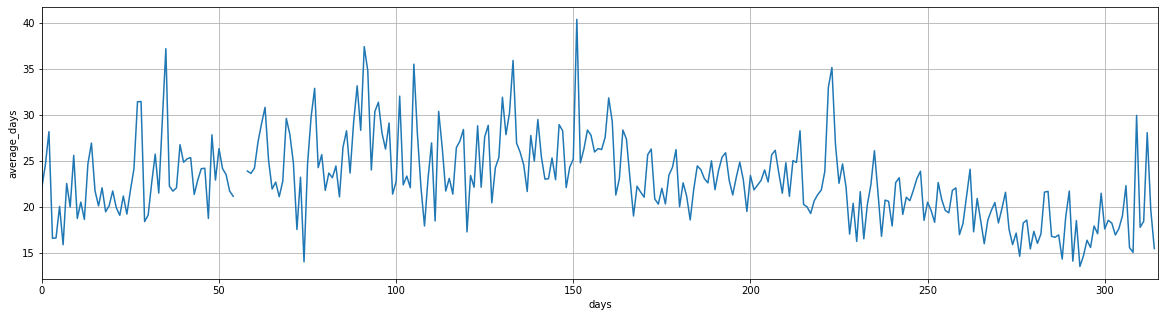

2019-01-20    22.100000
2019-01-21    24.596491
2019-01-22    28.173077
2019-01-23    16.571429
2019-01-24    16.611111
                ...    
2019-12-27    17.765957
2019-12-28    18.422535
2019-12-29    28.065217
2019-12-30    19.690141
2019-12-31    15.456790
Length: 315, dtype: float64

In [18]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.grid()
ax.grid()
ax.grid()
ax.set_xlim(0,315)

every_nth = 30

ax.set_xlabel("days")
ax.set_ylabel("average_days")

ax.plot(range(0,315), mean.values)        

plt.show()

mean

In [19]:
TimeFrames = pd.DataFrame(df_RAW["Starttime"].value_counts())
TimeFrames = TimeFrames[TimeFrames["Starttime"] > 4]
wrong = df_RAW[df_RAW["Starttime"].isin(TimeFrames.index) ].sort_values("Starttime")

TimeFrames_End = pd.DataFrame(df_RAW["End_time"].value_counts())
TimeFrames_End = TimeFrames_End[TimeFrames_End["End_time"] > 4]
wrong_END= wrong[wrong["End_time"].isin(TimeFrames_End.index)]

wrong_END.groupby("Starttime")["duration"].mean()
wrong_END.groupby("Starttime")["duration"].count()
wrong_END.groupby("Starttime")["duration"].min()


wrong_data = pd.DataFrame(columns=["Mean","Count", "min"], index= wrong_END["Starttime"], data = {"Mean":wrong_END.groupby("Starttime")["duration"].mean(),
                                                                                     "min" :wrong_END.groupby("Starttime")["duration"].min(),
                                                                                     "Count":wrong_END.groupby("Starttime")["duration"].count()})


true = wrong_data.groupby("Starttime").max().head(50).sort_values("min")["Count"] > 4 
start_time = true.index.astype(str)
df.drop(df[df["Start_Time"].isin(start_time)].index, inplace=True)


looking for that data showed that the data are not normal bookings 264 bikes for 7 minutes seems very unlikly we decicde to drop that kind of bookings that are distribution of bikes throw out the stations. 

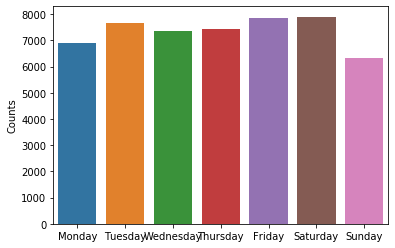

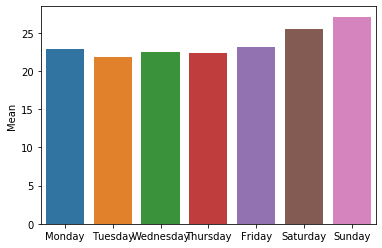

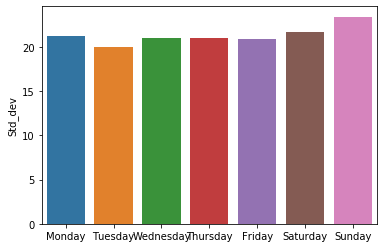

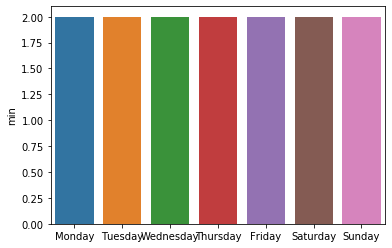

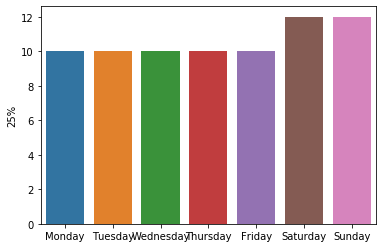

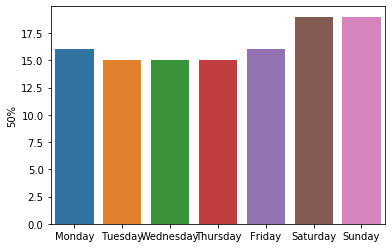

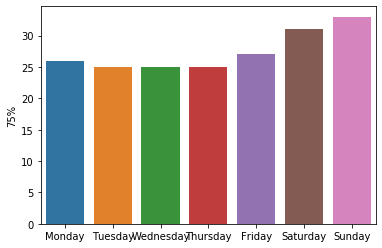

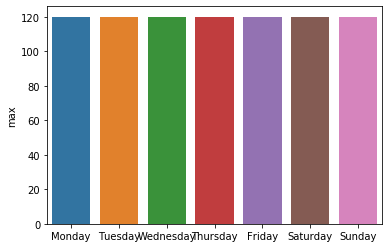

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16


In [20]:
    
    # Separate the df by weekdays Duration["Duration"]
    
    Stat_Mo = df[df["day"] == "Monday"]["Duration"].describe().values
    Stat_Tu = df[df["day"] == "Tuesday"]["Duration"].describe().values
    Stat_We = df[df["day"] == "Wednesday"]["Duration"].describe().values
    Stat_Th = df[df["day"] == "Thursday"]["Duration"].describe().values
    Stat_Fr = df[df["day"] == "Friday"]["Duration"].describe().values
    Stat_Sa = df[df["day"] == "Saturday"]["Duration"].describe().values
    Stat_Su = df[df["day"] == "Sunday"]["Duration"].describe().values


    week_duration = pd.DataFrame(index =["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], 
                                  data = [Stat_Mo, Stat_Tu, Stat_We, Stat_Th, Stat_Fr, Stat_Sa, Stat_Su]
                                  ,columns=["Counts","Mean", "Std_dev","min", "25%", "50%", "75%", "max"])
    week_duration
    
    for value in week_duration.columns:
        
        ax = sns.barplot(week_duration.index, week_duration[value])
        
        
        fig.set_figwidth(10)
        ax.set_ylabel(value)
       
        plt.show()

df    

Checkout the average duration per weekday.

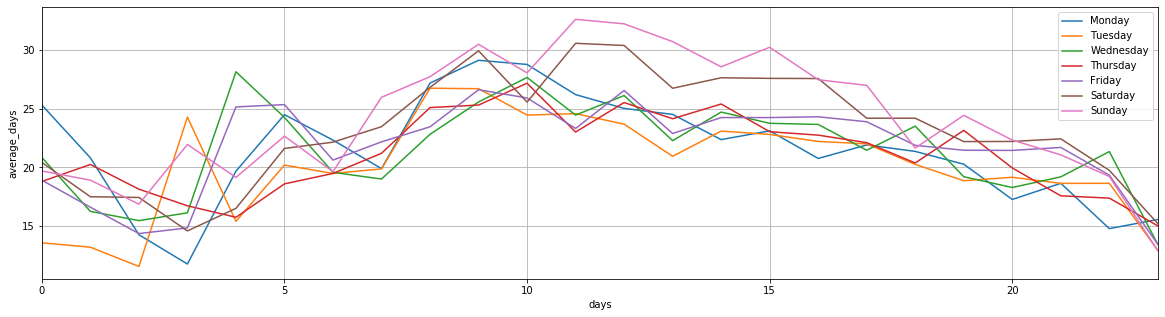

In [21]:
df["workday"] = pd.to_datetime(df["Start_Time"]).dt.strftime('%u').astype(int)
df["hour"] = pd.to_datetime(df["Start_Time"]).dt.strftime('%H').astype(int)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.set_xlabel("days")
ax.set_ylabel("average_days")
monday = df[df["day"] == "Monday"]
tuesday = df[df["day"] == "Tuesday"]
wednesday = df[df["day"] == "Wednesday"]
thursday = df[df["day"] == "Thursday"]
friday = df[df["day"] == "Friday"]
saturday = df[df["day"] == "Saturday"]
sunday = df[df["day"] == "Sunday"]






ax.grid()
ax.set_xlim(0,23)
ax.plot(range(0,24), monday.groupby("hour")["Duration"].mean(), label ="Monday")        
ax.plot(range(0,24), tuesday.groupby("hour")["Duration"].mean(), label ="Tuesday")   
ax.plot(range(0,24), wednesday.groupby("hour")["Duration"].mean(), label ="Wednesday")   
ax.plot(range(0,24), thursday.groupby("hour")["Duration"].mean(), label ="Thursday")   
ax.plot(range(0,24), friday.groupby("hour")["Duration"].mean(), label = "Friday")   
ax.plot(range(0,24), saturday.groupby("hour")["Duration"].mean(), label ="Saturday")   
ax.plot(range(0,24), sunday.groupby("hour")["Duration"].mean(), label ="Sunday")   

Stat_Mo
Stat_Tu
Stat_We
Stat_Th
Stat_Fr
Stat_Sa
Stat_Su
ax.legend()
plt.show()

Plots shows that the Weekend days has on average higher duration and higher std. deviation. 


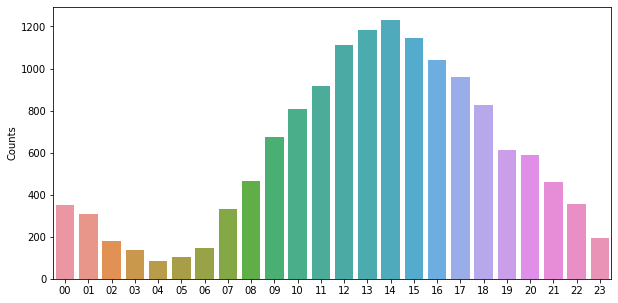

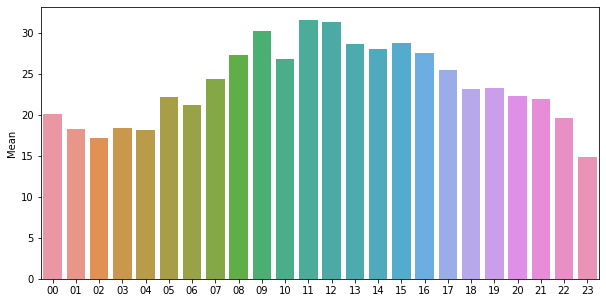

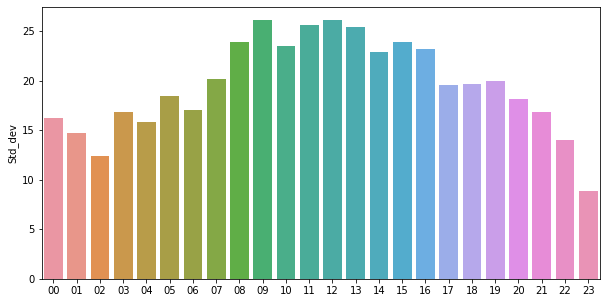

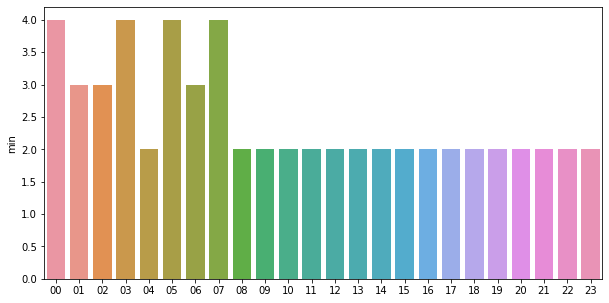

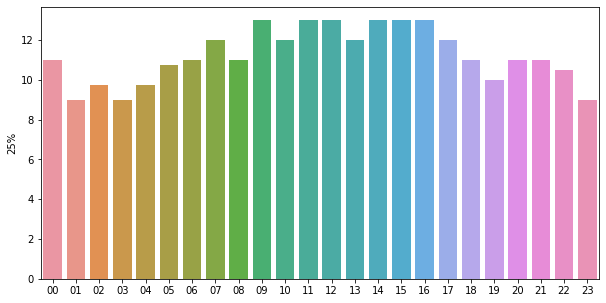

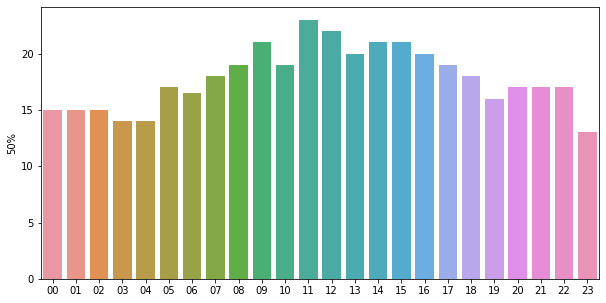

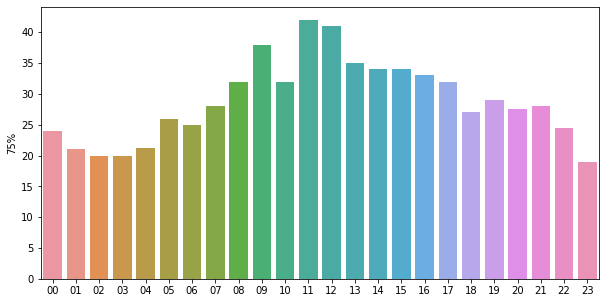

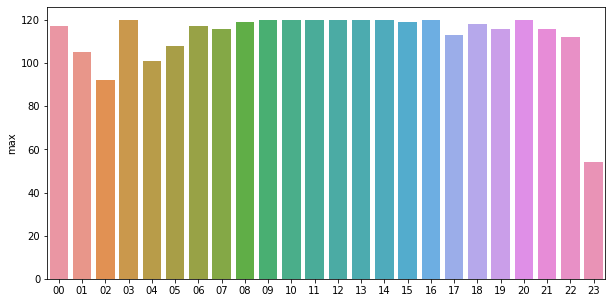

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour,workday
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15,4
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02,5
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06,2
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19,2
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12,5
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21,5
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08,6
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16,6


In [22]:
# added hour 
df["hour"] = pd.Series(index=df.index, data=list(map(lambda x: str(df.loc[x]["Start_Time"])[11:13], df.index)))


# Separate the df by hour of day 
Start_Time_0 = df[(df["hour"] == "00")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_1 = df[(df["hour"] == "01")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_2 = df[(df["hour"] == "02")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_3 = df[(df["hour"] == "03")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_4 = df[(df["hour"] == "04")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_5 = df[(df["hour"] == "05")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_6 = df[(df["hour"] == "06")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_7 = df[(df["hour"] == "07")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_8 = df[(df["hour"] == "08")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_9 = df[(df["hour"] == "09")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_10 = df[(df["hour"] == "10")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_11 = df[(df["hour"] == "11")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_12 = df[(df["hour"] == "12")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_13 = df[(df["hour"] == "13")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_14 = df[(df["hour"] == "14")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_15 = df[(df["hour"] == "15")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_16 = df[(df["hour"] == "16")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_17 = df[(df["hour"] == "17")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_18 = df[(df["hour"] == "18")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_19 = df[(df["hour"] == "19")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_20 = df[(df["hour"] == "20")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_21 = df[(df["hour"] == "21")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_22 = df[(df["hour"] == "22")& (df["Weekday"] == False)]["Duration"].describe().values
Start_Time_23 = df[(df["hour"] == "23")& (df["Weekday"] == False)]["Duration"].describe().values








hourly_duration = pd.DataFrame(index =["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18"
                                     ,"19","20","21","22","23"], 
                                  data = [Start_Time_0,Start_Time_1,Start_Time_2,Start_Time_3,Start_Time_4,Start_Time_5,
                                          Start_Time_6,Start_Time_7 ,Start_Time_8,Start_Time_9,Start_Time_10,Start_Time_11,
                                          Start_Time_12,Start_Time_13,Start_Time_14,Start_Time_15,Start_Time_16,Start_Time_17
                                          ,Start_Time_18,Start_Time_19,Start_Time_20,Start_Time_21,Start_Time_22,Start_Time_23]
                                  ,columns=["Counts","Mean", "Std_dev","min", "25%", "50%", "75%", "max"])
    
    
for value in hourly_duration.columns:
        
    ax = sns.barplot(hourly_duration.index, hourly_duration[value])
        
    fig  = plt.gcf()
    fig.set_figwidth(10)
    ax.set_ylabel(value)
    fig.set_figheight(5)
    plt.show()



df

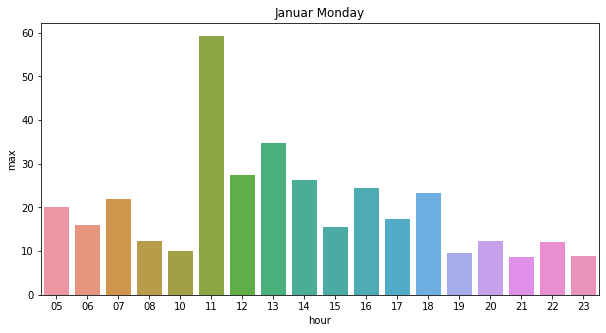

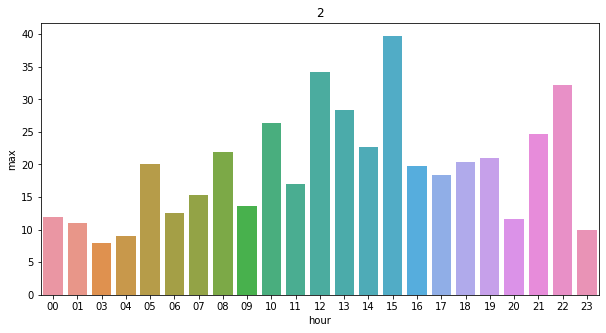

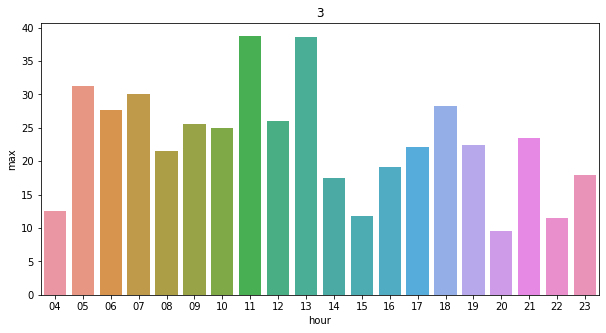

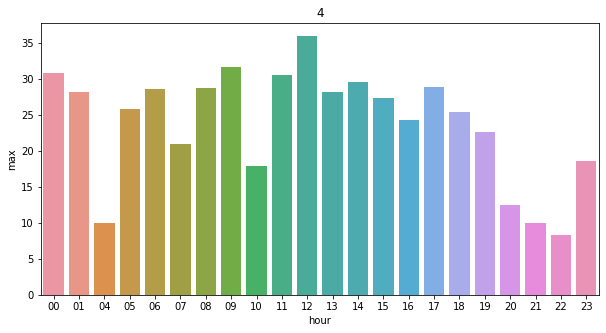

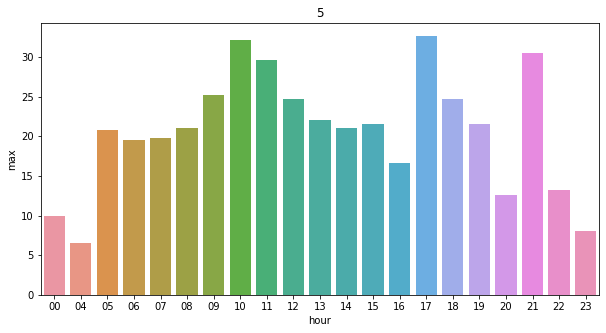

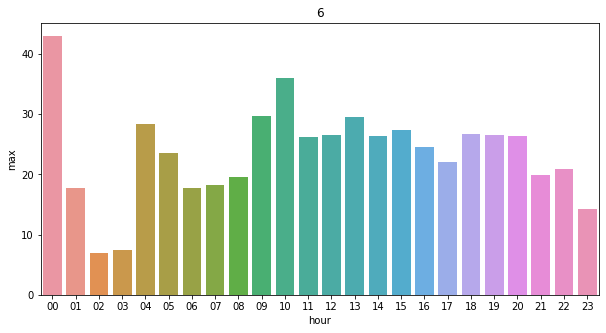

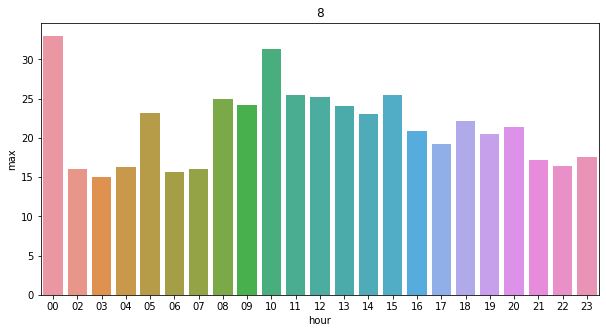

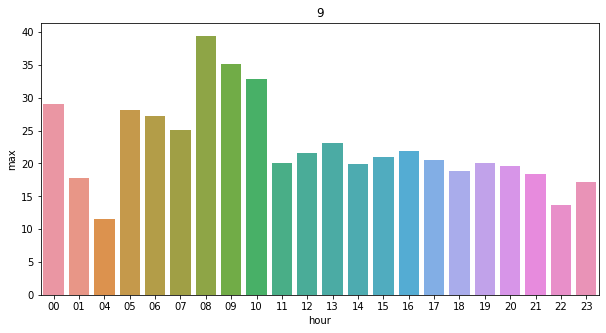

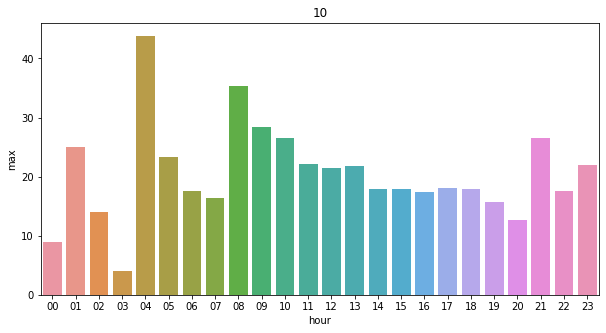

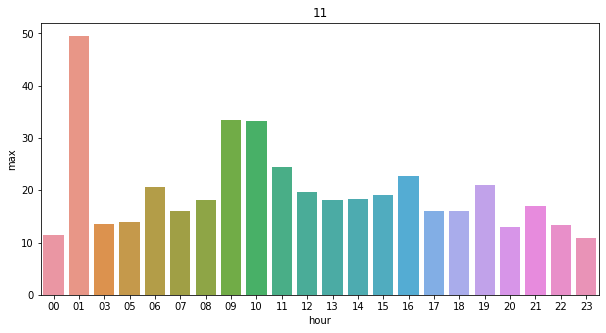

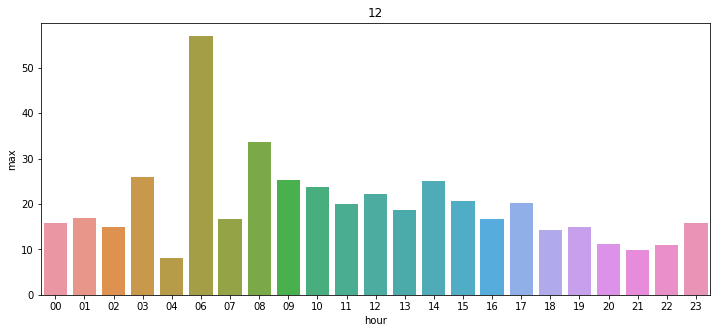

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour,workday
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15,4
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02,5
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06,2
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19,2
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12,5
154278,38999,2019-12-27 21:02:00,2019-12-27 21:16:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,8,1,60313,12,Friday,21,5
154279,38999,2019-12-28 08:16:00,2019-12-28 08:27:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,False,11.0,1,3,60318,12,Saturday,08,6
154281,38999,2019-12-28 16:37:00,2019-12-28 16:53:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,False,16.0,3,1,60313,12,Saturday,16,6


In [23]:
h_aug_th = df[(df["month"] == str("11")) & (df["day"] == "Thursday")]


#group by august hours
h_aug_mo = df[(df["month"] == str("01")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_tu = df[(df["month"] == str("02")) & (df["day"] == "Friday")].groupby("hour")["Duration"].mean()
h_aug_we = df[(df["month"] == str("03")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_th = df[(df["month"] == str("04")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_fr = df[(df["month"] == str("05")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_sa = df[(df["month"] == str("06")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_su = df[(df["month"] == str("08")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_se = df[(df["month"] == str("09")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_oc = df[(df["month"] == str("10")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_no = df[(df["month"] == str("11")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()
h_aug_de = df[(df["month"] == str("12")) & (df["day"] == "Monday")].groupby("hour")["Duration"].mean()



ax = sns.barplot(h_aug_mo.index, h_aug_mo.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("Januar Monday")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()


ax = sns.barplot(h_aug_tu.index, h_aug_tu.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("2")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()

ax = sns.barplot(h_aug_we.index, h_aug_we.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("3")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()


ax = sns.barplot(h_aug_th.index, h_aug_th.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("4")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()

ax = sns.barplot(h_aug_fr.index, h_aug_fr.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("5")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()


ax = sns.barplot(h_aug_sa.index, h_aug_sa.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("6")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()

ax = sns.barplot(h_aug_su.index, h_aug_su.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("8")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()


ax = sns.barplot(h_aug_se.index, h_aug_se.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("9")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()

ax = sns.barplot(h_aug_oc.index, h_aug_oc.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("10")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()


ax = sns.barplot(h_aug_no.index, h_aug_no.values)
        
fig  = plt.gcf()
fig.set_figwidth(10)
ax.set_title("11")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()

ax = sns.barplot(h_aug_de.index, h_aug_de.values)
        
fig  = plt.gcf()
fig.set_figwidth(12)
ax.set_title("12")
ax.set_ylabel(value)
fig.set_figheight(5)
plt.show()
df

look at the distribution after reducing to two hours duration for each month

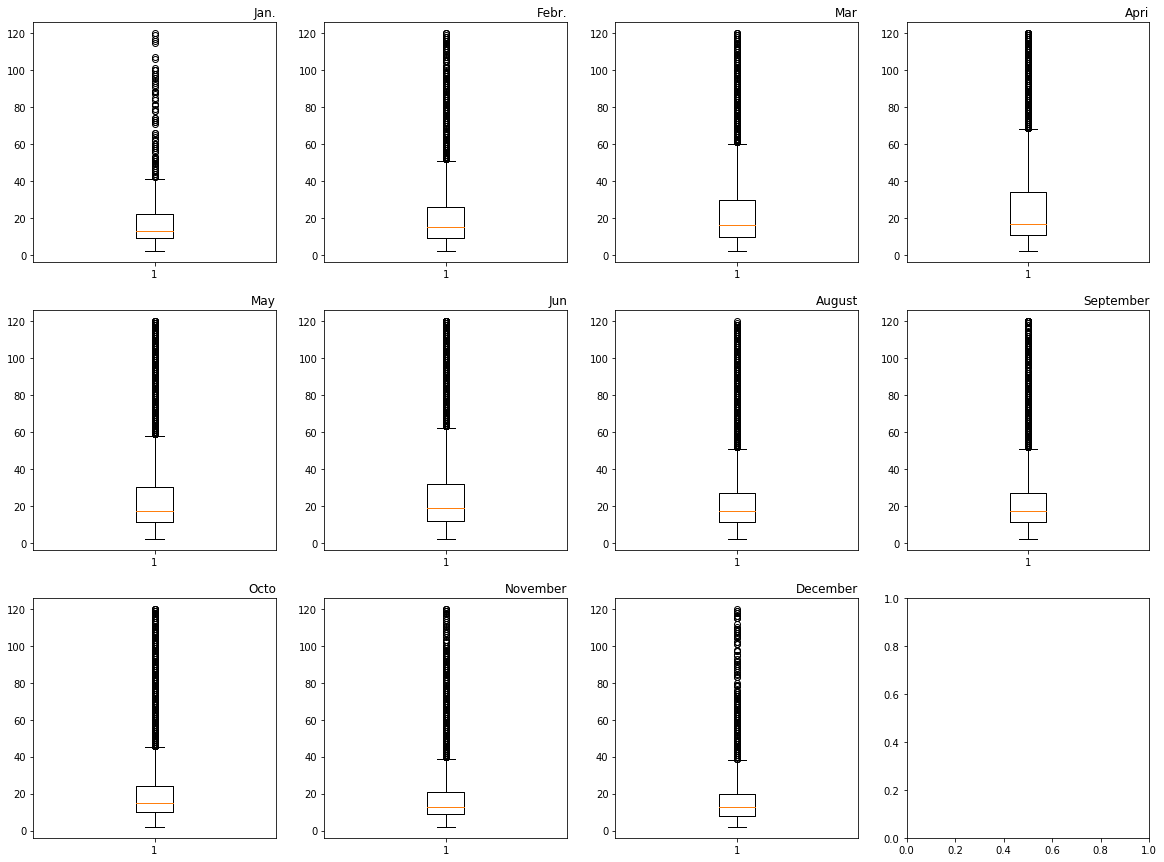

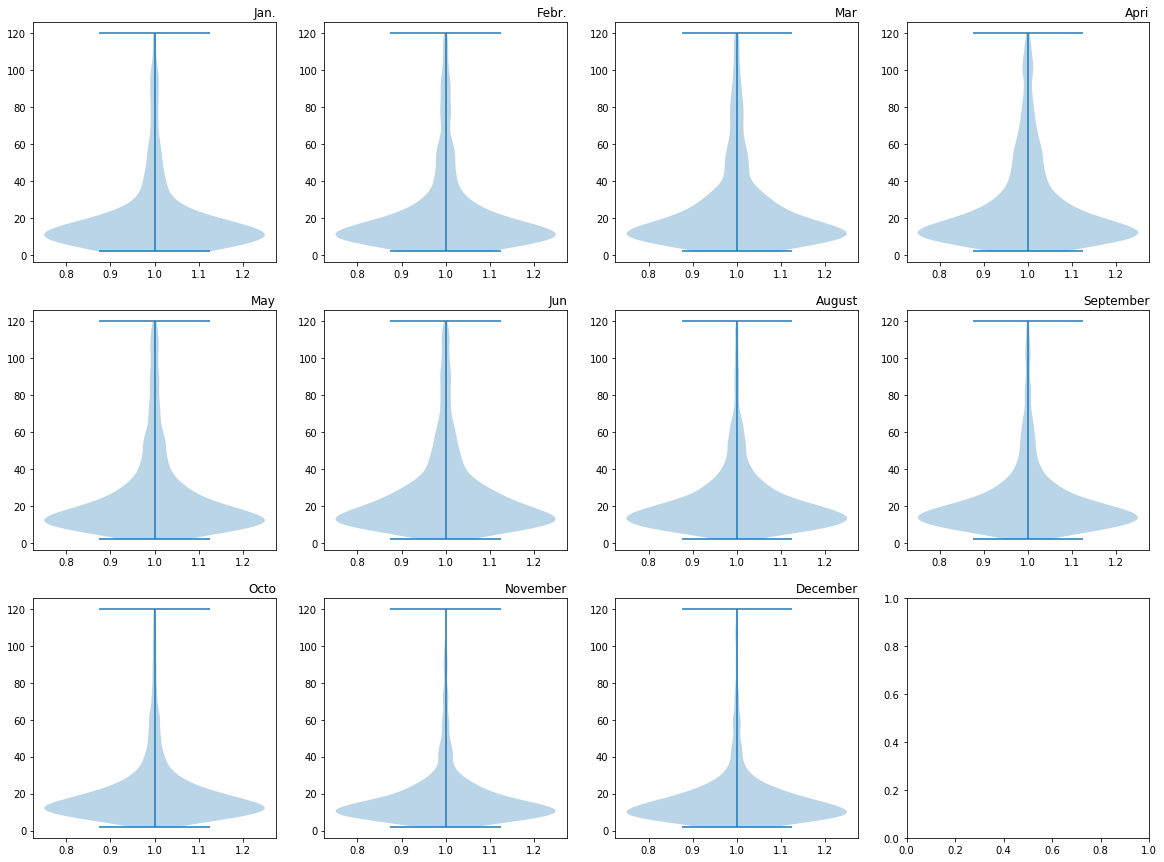

In [24]:
fig, ax = plt.subplots(nrows = 3,ncols=4, figsize=(20,15))

# Set the boxplots for each month, 
ax[0][0].boxplot(Stat_Ja["Duration"])
ax[0][1].boxplot(Stat_Fe["Duration"])
ax[0][2].boxplot(Stat_Ma["Duration"])

ax[0][3].boxplot(Stat_Ap["Duration"])
ax[1][0].boxplot(Stat_May["Duration"])
ax[1][1].boxplot(Stat_Ju["Duration"])

ax[1][2].boxplot(Stat_Au["Duration"])
ax[1][3].boxplot(Stat_Se["Duration"])

ax[2][0].boxplot(Stat_Oc["Duration"])
ax[2][1].boxplot(Stat_No["Duration"])
ax[2][2].boxplot(Stat_De["Duration"])

ax[0][0].set_title("Jan.", loc=("right"))
ax[0][1].set_title("Febr.", loc=("right"))
ax[0][2].set_title("Mar", loc=("right"))
ax[0][3].set_title("Apri", loc=("right"))
ax[1][0].set_title("May", loc=("right"))
ax[1][1].set_title("Jun", loc=("right"))
ax[1][2].set_title("August", loc=("right"))
ax[1][3].set_title("September", loc=("right"))
ax[2][0].set_title("Octo", loc=("right"))
ax[2][1].set_title("November", loc=("right"))
ax[2][2].set_title("December", loc=("right"))


# get the 
no_outliner_Ja = Stat_Ja["Duration"] 
no_outliner_Fe = Stat_Fe["Duration"] 
no_outliner_Ma = Stat_Ma["Duration"] 
no_outliner_Ap = Stat_Ap["Duration"] 
no_outliner_May = Stat_May["Duration"] 
no_outliner_Ju = Stat_Ju["Duration"]
no_outliner_Au = Stat_Au["Duration"]
no_outliner_Se = Stat_Se["Duration"] 
no_outliner_Oc = Stat_Oc["Duration"]
no_outliner_No = Stat_No["Duration"]
no_outliner_De = Stat_De["Duration"] 
plt.show()

fig_V, ax_v = plt.subplots(nrows = 3,ncols=4, figsize=(20,15))

# Set the boxplots for each month, 
ax_v[0][0].violinplot(Stat_Ja["Duration"])
ax_v[0][1].violinplot(Stat_Fe["Duration"])
ax_v[0][2].violinplot(Stat_Ma["Duration"])

ax_v[0][3].violinplot(Stat_Ap["Duration"])
ax_v[1][0].violinplot(Stat_May["Duration"])
ax_v[1][1].violinplot(Stat_Ju["Duration"])

ax_v[1][2].violinplot(Stat_Au["Duration"])
ax_v[1][3].violinplot(Stat_Se["Duration"])

ax_v[2][0].violinplot(Stat_Oc["Duration"])
ax_v[2][1].violinplot(Stat_No["Duration"])
ax_v[2][2].violinplot(Stat_De["Duration"])

ax_v[0][0].set_title("Jan.", loc=("right"))
ax_v[0][1].set_title("Febr.", loc=("right"))
ax_v[0][2].set_title("Mar", loc=("right"))
ax_v[0][3].set_title("Apri", loc=("right"))
ax_v[1][0].set_title("May", loc=("right"))
ax_v[1][1].set_title("Jun", loc=("right"))
ax_v[1][2].set_title("August", loc=("right"))
ax_v[1][3].set_title("September", loc=("right"))
ax_v[2][0].set_title("Octo", loc=("right"))
ax_v[2][1].set_title("November", loc=("right"))
ax_v[2][2].set_title("December", loc=("right"))
plt.show()

Since it seems to had still some outliers the dropping of them are not usefull because the the data set would get to small. To get the trade-of between the bias and the variance we decide to leave the duration by max of 2 hours.

First we will investigate the number of trips on monthly base. As seen before the month have different distrubtions between the each other referent to the duration of trips.

In [25]:

# duration each month
print(Stat_Ja["Duration"].describe())
print(Stat_Fe["Duration"].describe())
print(Stat_Ma["Duration"].describe())
print(Stat_Ap["Duration"].describe())
print(Stat_May["Duration"].describe())
print(Stat_Ju["Duration"].describe())
print(Stat_Au["Duration"].describe())
print(Stat_Se["Duration"].describe())
print(Stat_Oc["Duration"].describe())
print(Stat_No["Duration"].describe())
print(Stat_De["Duration"].describe())


count    655.000000
mean      21.088550
std       22.046964
min        2.000000
25%        9.000000
50%       13.000000
75%       22.000000
max      120.000000
Name: Duration, dtype: float64
count    2327.000000
mean       23.468844
std        23.417419
min         2.000000
25%         9.000000
50%        15.000000
75%        26.000000
max       120.000000
Name: Duration, dtype: float64
count    2820.000000
mean       25.123050
std        23.560496
min         2.000000
25%        10.000000
50%        16.000000
75%        30.000000
max       120.000000
Name: Duration, dtype: float64
count    4264.000000
mean       26.978893
std        24.453655
min         2.000000
25%        11.000000
50%        17.000000
75%        34.000000
max       120.000000
Name: Duration, dtype: float64
count    5376.000000
mean       25.622768
std        23.800445
min         2.000000
25%        11.000000
50%        17.000000
75%        30.000000
max       120.000000
Name: Duration, dtype: float64
count    7781

As shown the average duration is around 17,5 minutes and 

The number of trips duration in the summer month are highest where as the bookings in the winter gets down. As it seems that there are longer trips on average in the winter month.

As next we will take look at the timeframes 

In [26]:
DF_Summer = df[list(map(lambda x: (df.loc[x]["Start_Time"][5:7] in ["06", "08", "09"]) & (df.loc[x]["Weekday"] == True), df.index))]
DF_Winter = df[list(map(lambda x: (df.loc[x]["Start_Time"][5:7] in ["01", "02", "03"]) & (df.loc[x]["Weekday"] == True), df.index))]

DF_Summer["Duration"] = stats.zscore(DF_Summer["Duration"])
DF_Winter["Duration"] = stats.zscore(DF_Winter["Duration"])


DF_Summer = DF_Summer.groupby("hour")
DF_Winter = DF_Winter.groupby("hour")


weather["hour"] = weather[(weather["date"] > 2019053100) & (weather["date"] < 2019090100)]["date"].astype(str).str.replace("^[0-9]{8}","")
temp_hour = weather.groupby("hour").mean()

weather["hour"] = weather[(weather["date"] > 2019010100) & (weather["date"] < 2019040100)]["date"].astype(str).str.replace("^[0-9]{8}","")
temp_hour_winter = weather.groupby("hour").mean()





temp_hour_winter

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,hourly temperatur,relative humidity,Rainfall,SD_SO,V_VV
hour,,,,,,
00,2.019022e+09,4.584270,80.044944,0.020225,0.000000,34138.202247
01,2.019022e+09,4.301111,81.411111,0.012222,0.000000,33030.000000
02,2.019022e+09,4.047778,82.677778,0.025556,0.000000,30693.333333
03,2.019022e+09,3.841111,83.511111,0.054444,0.000000,29973.333333
04,2.019022e+09,3.664444,84.644444,0.043333,0.000000,28863.333333
05,2.019022e+09,3.574444,85.044444,0.058889,0.000000,27838.888889
06,2.019022e+09,3.502222,85.233333,0.052222,0.944444,28118.888889
07,2.019022e+09,3.760000,84.622222,0.048889,7.900000,28084.444444
08,2.019022e+09,4.477778,81.322222,0.026667,16.666667,26647.777778


In [27]:
DF_Summer = df[list(map(lambda x: (df.loc[x]["Start_Time"][5:7] in ["06", "08", "09"]) & (df.loc[x]["Weekday"] == True), df.index))]

DF_Summer["Duration"] = stats.zscore(DF_Summer["Duration"])

DF_Summer = DF_Summer.groupby("hour").mean()
DF_Summer

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Bike_number,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,workday
hour,,,,,,,,,,,,,
00,38444.958333,8.681191,50.115464,8.676450,50.119962,3351.625000,3472.675000,True,-0.037046,2.883333,2.350000,60376.375000,3.716667
01,38478.910714,8.678757,50.113635,8.680259,50.120073,3166.303571,3033.660714,True,-0.208621,2.571429,2.446429,60426.214286,3.446429
02,38533.600000,8.677978,50.112923,8.680522,50.112062,2876.560000,1524.000000,True,-0.317901,2.400000,2.080000,60395.600000,3.800000
03,38527.236842,8.679317,50.116166,8.682351,50.114145,4342.684211,3666.368421,True,-0.297673,2.473684,2.447368,60463.526316,3.236842
04,38444.078261,8.658461,50.112462,8.661991,50.111844,2673.356522,4319.660870,True,-0.098530,2.373913,2.269565,60639.721739,2.982609
05,38474.987261,8.665329,50.113069,8.663391,50.111585,3410.259554,3032.100318,True,-0.071490,2.794586,2.552548,60538.707006,2.974522
06,38451.424823,8.664879,50.115197,8.669181,50.079375,3196.806383,2974.709929,True,-0.185878,2.494326,2.515603,60431.452482,2.974468
07,38440.608008,8.668345,50.115556,8.671040,50.010522,3183.731296,3263.859852,True,-0.152803,2.620653,2.923077,60429.344573,3.064278
08,38485.700637,8.673883,50.116348,8.674540,50.037962,2978.542994,3367.256369,True,0.270281,2.401274,3.221338,60461.194268,3.011146


In [49]:
# plot the average duration
ax = sns.barplot(x = trips_time_mean.index, y = "average_duration", data=trips_time_mean, capsize=0.5 )
gcf  = plt.gcf()
gcf.set_figwidth(10)
gcf.set_figheight(5)
# ax.plot(trips_time_mean.index, trips_time_mean["average_duration"])
plt.show()

NameError: name 'trips_time_mean' is not defined

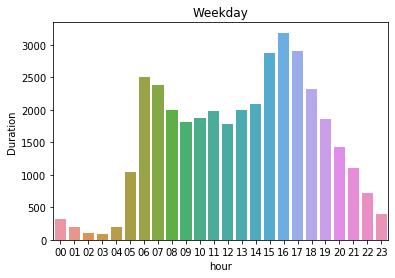

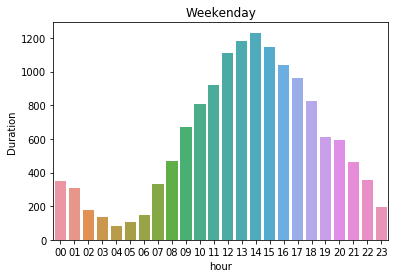

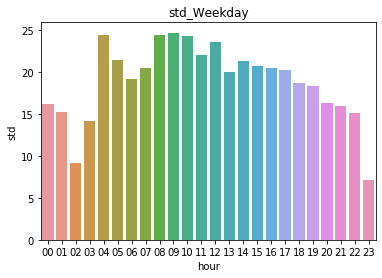

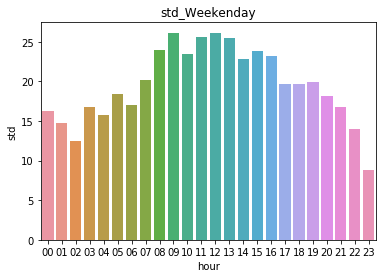

In [30]:
# load the booking for weekday 
we_Hour = df[(df["Weekday"] == True)].groupby("hour")["Duration"].count()
weEnd_Hour = df[(df["Weekday"] == False)].groupby("hour")["Duration"].count()


# plot the average duration
ax0 = sns.barplot(x = we_Hour.keys(), y = we_Hour , capsize=0.5 )
ax0.set_title("Weekday")
plt.show()
ax1 = sns.barplot(x = weEnd_Hour.keys(), y = weEnd_Hour, capsize=0.5 )
ax1.set_title("Weekenday")
fig.set_figwidth(30)
fig.set_figheight(15)
# ax.plot(trips_time_mean.index, trips_time_mean["average_duration"])
plt.show()

ax3 = sns.barplot(x= we_Hour.keys(), y= df[(df["Weekday"] == True)].groupby("hour")["Duration"].describe()["std"], capsize=0.5 )
ax3.set_title("std_Weekday")
plt.show()

ax4 = sns.barplot(x= we_Hour.keys(), y= df[(df["Weekday"] == False)].groupby("hour")["Duration"].describe()["std"], capsize=0.5 )
ax4.set_title("std_Weekenday")
plt.show()


As the analysis shows the average duration highest in the morning hours abount 8-10 (go to work and university) and 12 o clock and lowest in the night. What is logicaly.The differents between the weekday and weekend bookings are in the morning hours. Where the average duration is higher in the weekend in the night. Where as the standard deviation is generally high. That is due to very high values. 

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Januar


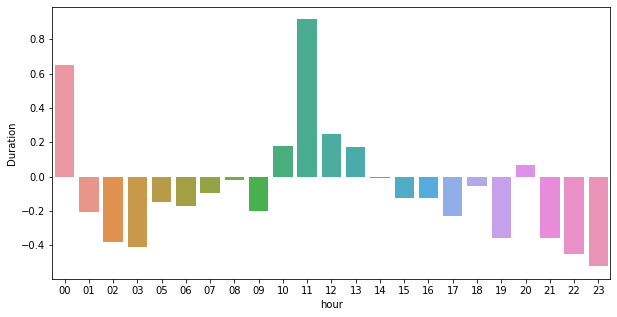

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Februar


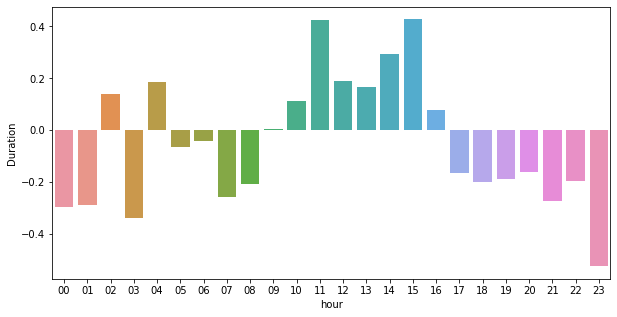

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


March


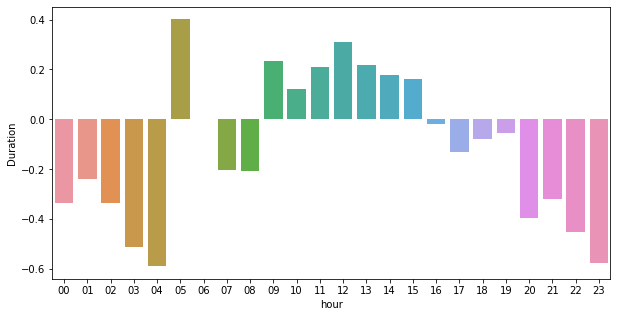

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


April


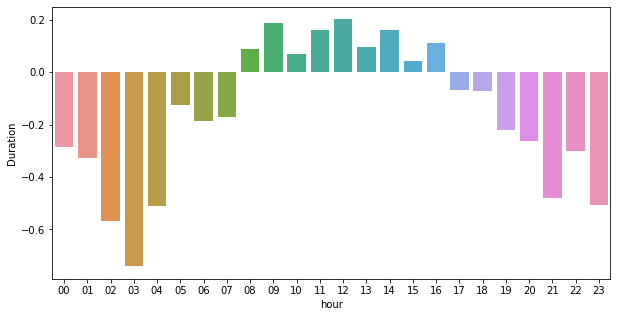

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mai


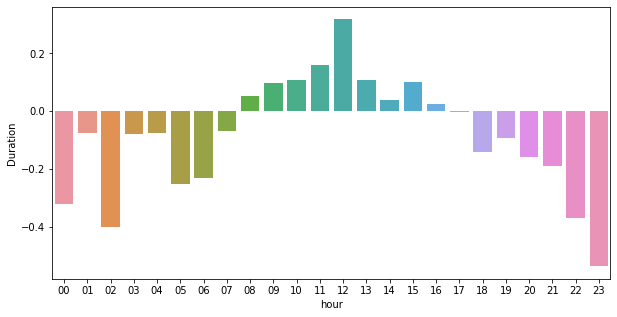

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


June


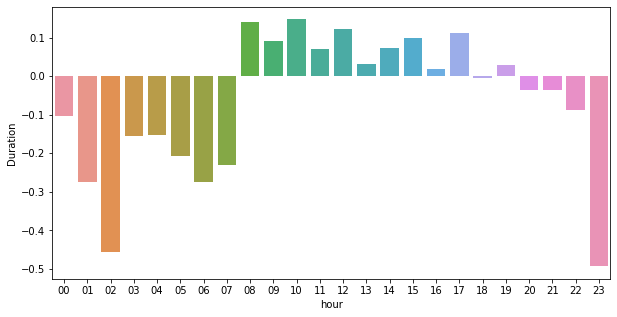

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


August


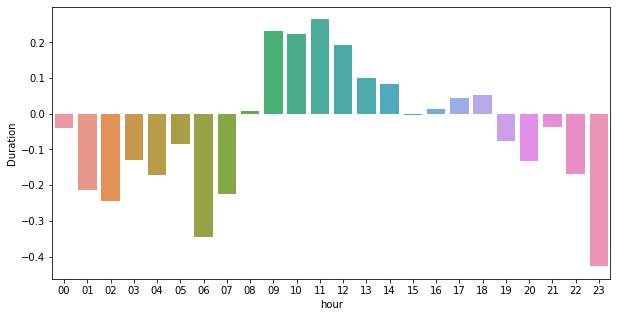

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


September


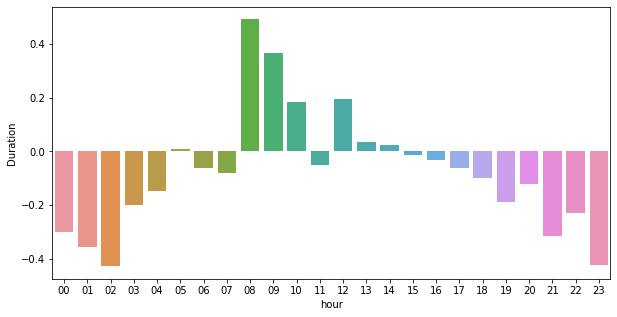

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


October


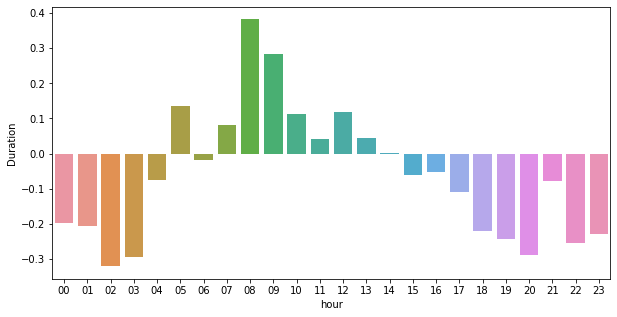

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


November


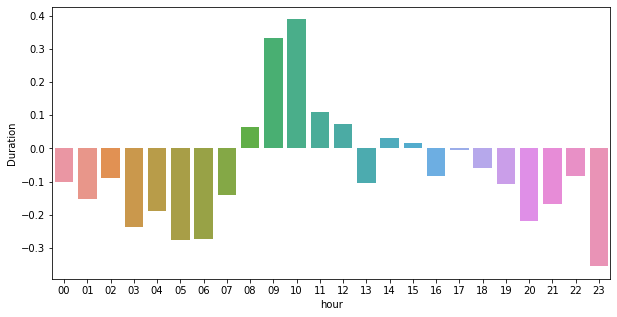

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


December


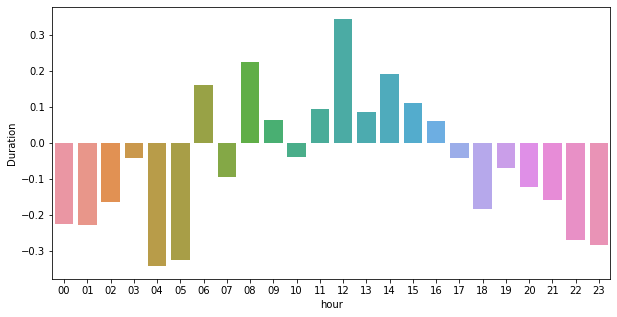

In [31]:
# Import the z-score 
from scipy import stats

Stat_Ja["duration"] = stats.zscore(Stat_Ja["Duration"])


# set data
months = [Stat_Ja,Stat_Fe,Stat_Ma,Stat_Ap,Stat_May,Stat_Ju,Stat_Au,Stat_Se,Stat_Oc,Stat_No,Stat_De]

# create labels for plots 
labels = ["Januar"  , 
                "Februar",
                            "March"  ,
                            "April"  ,
                            "Mai"  ,
                            "June"  ,
                            "August" ,
                            "September" ,
                            "October" ,
                            "November" ,
                            "December" ]

i=0 
for month in months:
    month["Duration"] = stats.zscore(month["Duration"])
    month_grouped = pd.DataFrame(month.groupby(month["hour"])["Duration"].mean())
    month_grouped = month_grouped.sort_values("Duration", ascending=True)
    month_grouped.reset_index(inplace=True)
    # number of trips per hours
    sns.barplot(x = "hour", y = "Duration", data=month_grouped )
    
    gcf  = plt.gcf()
    print(labels[i])
    i+=1
    gcf.set_figwidth(10)
    gcf.set_figheight(5)
    plt.show()

Plot the mean of the gours per day. 

In [34]:
Weekend = df[df["Weekday"] == False]
no_Weekend = df[df["Weekday"] == True]

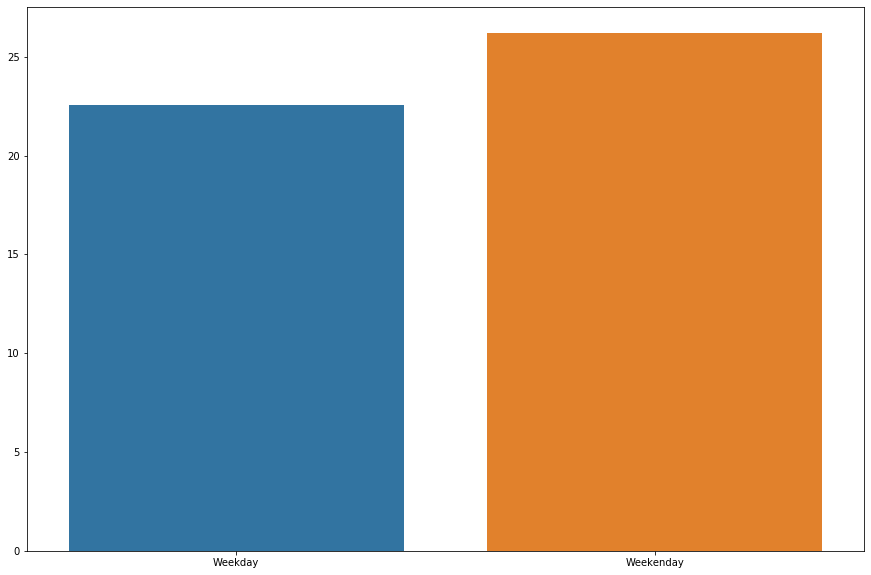

,Bike_number,Start_Time,End_time,Start_Longitude,Start_Latitude,End_Longitude,End_Latitude,Start_Station,End_Station_number,Weekday,Duration,Bikes_on_position,End_Bikes,Zip_codes,month,day,hour,workday
13,11451,2019-05-30 15:42:00,2019-05-30 17:22:00,8.553437,50.101748,8.554450,50.101711,4291.0,0.0,True,100.0,5,1,65929,05,Thursday,15,4
14,11451,2019-05-31 02:22:00,2019-05-31 02:32:00,8.554450,50.101711,8.556589,50.114979,0.0,0.0,True,10.0,1,1,65929,05,Friday,02,5
22,11542,2019-09-10 06:53:00,2019-09-10 07:28:00,8.664168,50.107599,8.611191,50.124972,4240.0,0.0,True,35.0,9,1,60329,09,Tuesday,06,2
26,11542,2019-09-10 19:57:00,2019-09-10 20:06:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,9.0,6,5,60329,09,Tuesday,19,2
28,11542,2019-09-11 06:48:00,2019-09-11 06:55:00,8.664168,50.107599,8.664168,50.107599,4240.0,4240.0,True,7.0,1,1,60329,09,Wednesday,06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154271,38999,2019-12-23 20:41:00,2019-12-23 20:55:00,8.687546,50.115009,8.692439,50.128915,4247.0,4252.0,True,14.0,7,2,60313,12,Monday,20,1
154273,38999,2019-12-24 07:25:00,2019-12-24 07:34:00,8.692439,50.128915,8.682500,50.115556,4252.0,42006.0,True,9.0,2,3,60318,12,Tuesday,07,2
154274,38999,2019-12-24 14:12:00,2019-12-24 14:27:00,8.682500,50.115556,8.692439,50.128915,42006.0,4252.0,True,15.0,3,2,60313,12,Tuesday,14,2
154277,38999,2019-12-27 12:01:00,2019-12-27 12:13:00,8.692439,50.128915,8.687546,50.115009,4252.0,4247.0,True,12.0,1,8,60318,12,Friday,12,5


In [35]:
weekend_mean = pd.Series({"Weekday" : no_Weekend["Duration"].mean(), 
                            "Weekenday" : Weekend["Duration"].mean()})

ax = sns.barplot(weekend_mean.keys(), weekend_mean.values)
gcf  = plt.gcf()
gcf.set_figwidth(15)
gcf.set_figheight(10)
plt.show()
no_Weekend

In [37]:

Stations = pd.DataFrame(df[df["Start_Station"] != 0].groupby("Start_Station", as_index=True).count()["Duration"])


# Number of startings on each station
Stations.sort_index(inplace=True)
Stations

,Duration
Start_Station,
4129.0,72
4130.0,296
4131.0,269
4132.0,316
4135.0,276
...,...
42002.0,72
42003.0,19
42004.0,67


# Hier startet prediction

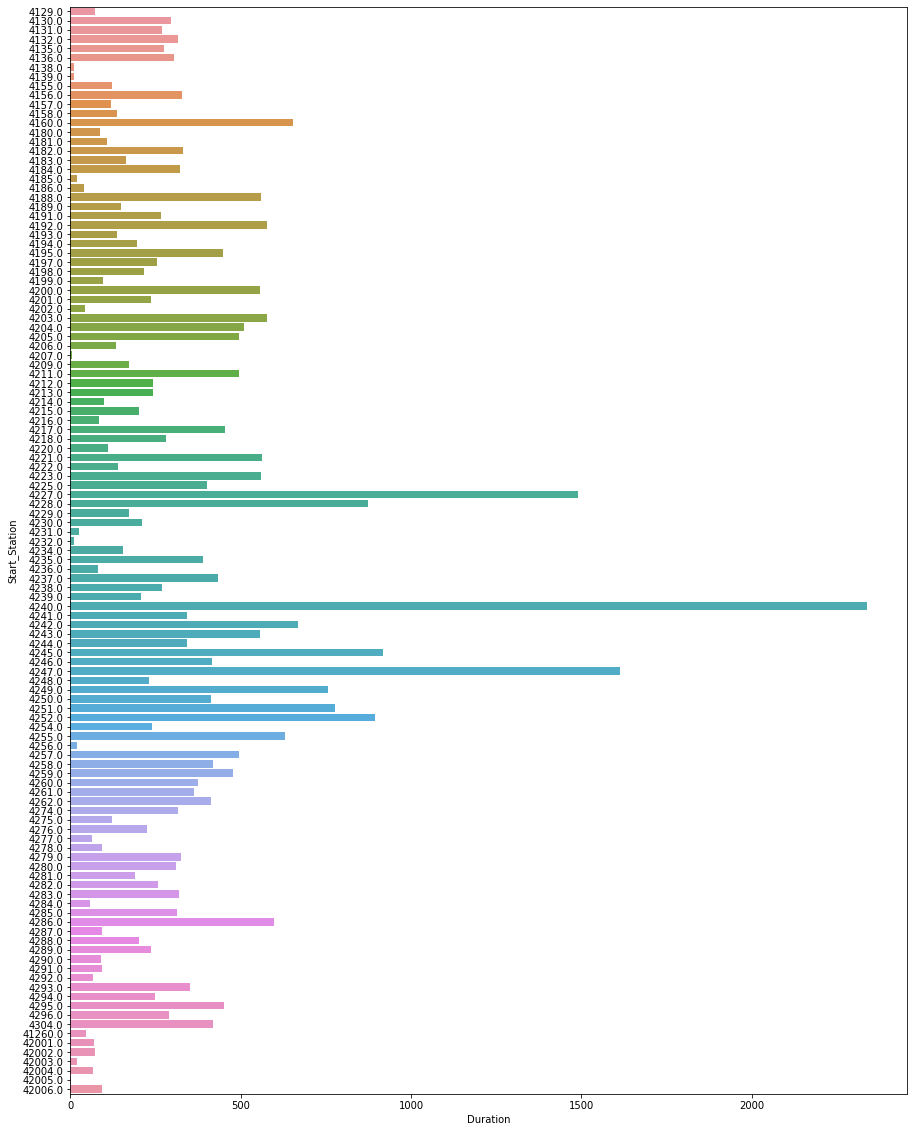

In [38]:
# number of stations as starting point
ax = sns.barplot(x= "Duration", y= Stations.index, data=Stations, orient="h")

ax.figure.set_figheight(20)
ax.figure.set_figwidth(15)

In [41]:
Station_base = ""

Station_each = pd.Series({})

Stations = df[df["Start_Station"] != 0]["Start_Station"].value_counts()

Station_base = pd.DataFrame(data=Stations, index=Stations.index, columns=["Station"])

for station in Station_base.index: 

    One_Station = df[df["Start_Station"] == int(station)]["Duration"].describe()[2]
    Station_base.loc[station] = One_Station
Station_base    

Station_base.reset_index(inplace = True)

C:\Users\manue\miniconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


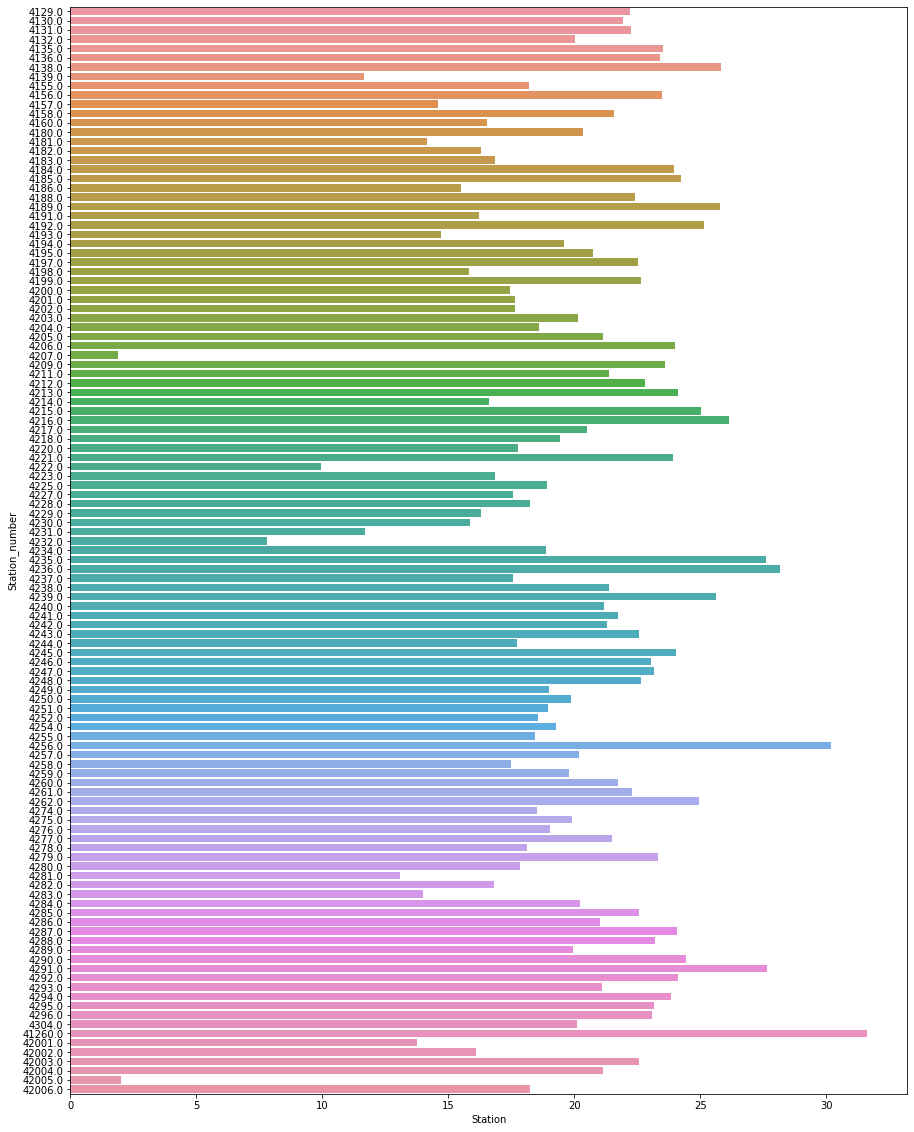

In [42]:

# average duration per station
Sort = Station_base.sort_values("Station")


Sort.rename(columns={"index":"Station_number"}, inplace = True)

ax = sns.barplot(y= Sort["Station_number"], x= "Station", data=Sort, orient="h")

ax.figure.set_figheight(20)
ax.figure.set_figwidth(15)

In [43]:
Station_base

,index,Station
0,4240.0,21.1659
1,4247.0,23.1634
2,4227.0,17.5708
3,4245.0,24.0265
4,4252.0,18.554
...,...,...
112,4232.0,7.80093
113,4138.0,25.8132
114,4139.0,11.6471
115,4207.0,1.91485
